# SETUP

In [1]:
# ========================
# 1. Standard Libraries
# ========================
import os
import time
import random
import pickle
import warnings
import itertools
from collections import Counter
from datetime import datetime
from itertools import combinations
from joblib import Parallel, delayed
from math import pi

# ========================
# 2. Numerical & Statistical Computation
# ========================
import numpy as np
import pandas as pd
import scipy
import scipy.signal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, spearmanr, kruskal
from scikit_posthocs import posthoc_conover
import pingouin as pg

# ========================
# 3. Machine Learning - Models
# ========================
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import HuberRegressor, LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import davies_bouldin_score, silhouette_score

# ========================
# 4. Machine Learning - Metrics & Utilities
# ========================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, r2_score
)
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
)
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
import statsmodels

# ========================
# 5. EEG & Signal Processing
# ========================
import mne
import eeg_routines
from eeg_routines import parcellation
from neurodsp.timefrequency import *
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
from neurodsp.plts import plot_timefrequency
from fooof import FOOOF, FOOOFGroup
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import (
    plot_spectrum, plot_spectra, plot_spectrum_shading, plot_spectra_shading
)
from fooof.plts.annotate import plot_annotated_peak_search, plot_annotated_model
from diptest import diptest

# ========================
# 6. Visualization
# ========================
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.colors as cs
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib.ticker import FuncFormatter, FormatStrFormatter
from matplotlib.patches import Rectangle
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator

# ========================
# 7. Dimensionality Reduction & Feature Engineering
# ========================
import umap.umap_ as umap

# ========================
# 8. Miscellaneous
# ========================
import sklearn_extensions
from mpl_toolkits import mplot3d
import mat73
from tabulate import tabulate
from tqdm.notebook import tqdm

# ========================
# 9. Experiment Configuration
# ========================
times = np.linspace(-300, 1000, 666)
expectation = np.logical_and(times > -300, times < 0)
encoding = np.logical_and(times > 0, times < 200)
decision = np.logical_and(times > 200, times < 600)
postdecision = np.logical_and(times > 600, times < 1000)
decision_postdecision = np.logical_and(times > 200, times < 1000)

df_scalp, coordinates, channel_dict, nameChans, name, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10 = eeg_routines.parcellation()
print(channel_dict)

Q = {
    'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Q4': Q4, 'Q5': Q5,
    'Q6': Q6, 'Q7': Q7, 'Q8': Q8, 'Q9': Q9, 'Q10': Q10,
}

# ========================
# 10. Directory Setup
# ========================
now = datetime.now()
date = now.strftime("%Y%m%d%H%M%S")
savePath = "./"
experiment_dir = os.path.join(savePath, f"{date}-experiment-paper/")
os.makedirs(experiment_dir, exist_ok=True)
print(f"Directory created: {experiment_dir}")

# ========================
# 11. Constants
# ========================
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']
LETTERS = letters


61
{'AF7': [68.5722, 54.83970000000001, -10.59], 'AF3': [76.83709999999999, 33.700700000000005, 21.227], 'Fp1': [83.91709999999999, 29.436700000000002, -6.990000000000001], 'Fp2': [84.89590000000003, -29.872300000000035, -7.079999999999998], 'AF4': [77.7259, -35.71230000000002, 21.956000000000007], 'AF8': [69.6568, -55.743300000000026, -10.754999999999997], 'F7': [42.474300000000014, 70.26289999999999, -11.420000000000007], 'F5': [48.03530000000002, 64.46579999999997, 16.921], 'F3': [53.111200000000004, 50.243799999999986, 42.192], 'F1': [56.9311, 27.495799999999992, 60.342], 'F2': [57.60190000000001, -29.514200000000024, 59.54], 'F4': [54.30480000000001, -51.83620000000003, 40.814], 'F6': [49.82969999999999, -67.91420000000001, 16.367], 'F8': [44.421699999999994, -73.04310000000001, -12.0], 'FT7': [14.120300000000023, 80.775, -11.135], 'FC5': [18.64330000000003, 77.21489999999997, 24.459999999999987], 'FC3': [22.716200000000008, 60.181899999999985, 55.544], 'FC1': [26.011100000000003,

# basic pars

In [2]:
# Set general font size for all text elements
plt.rcParams.update({'font.size': 11})
plt.rcParams['axes.titlesize'] = 11     # Titolo dell'asse
plt.rcParams['axes.labelsize'] = 11      # Etichette degli assi
plt.rcParams['xtick.labelsize'] = 11     # Etichette dei tick sull'asse x
plt.rcParams['ytick.labelsize'] = 11     # Etichette dei tick sull'asse y
plt.rcParams['legend.fontsize'] = 11     # Font della legenda
plt.rcParams['figure.titlesize'] = 11    # Titolo della figura

colors_HS = ['b', 'cyan', 'green']
colors_SCD = ['orange', 'cyan', 'green']
colors_MCI = ['red', 'cyan', 'green']
colors_ATN = ['purple', 'brown', 'k']


# routines

In [3]:
def remove_outliers_iqr(data):
    """Rimuove gli outliers utilizzando il metodo IQR."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [4]:
def plot_scalp(ax, mask):

    selected_channels = []
    for i in range(len(name)): selected_channels.append(name[i][0][0])
    red_indices = mask
    standard_montage = mne.channels.make_standard_montage('standard_1020')
    selected_pos = {ch: pos for ch, pos in standard_montage.get_positions()['ch_pos'].items() if ch in selected_channels}
    custom_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')
    channel_names = list(custom_montage.ch_names)
    channel_colors = ['k'] * len(channel_names)  
    if mask!=None: 
        for i in red_indices:
            channel_colors[i] = 'r'  
    pos = np.array([custom_montage.get_positions()['ch_pos'][ch][:2] for ch in channel_names])
    
    im, _ = mne.viz.plot_topomap(data=[0]*len(channel_names), pos=pos, axes=ax, show=False, sensors=False);
    for i, (ch_name, (x, y)) in enumerate(zip(channel_names, pos)):
        ax.text(x, y, ch_name, color=channel_colors[i], ha='center', va='center')

In [5]:
def computePeakLat(times, erp, q, tlims, operator, windowInt, noPeak=False, median=False):
    
    dx = times[1] - times[0]
    dx = dx*1e3
    noPeak=False
    maskTime = np.logical_and(times> tlims[0] , times < tlims[1])
    peak, lat, integral = [], [], []

    if noPeak==False:

        for vector in erp[Q[q], :]:#[np.logical_and(times> tlims[0] , times < tlims[1])]
            #print(vector)
            peak_index = operator(vector[maskTime])
            peak.append(vector[maskTime][peak_index])
            lat.append(times[maskTime][peak_index]*1e3)
            #halfWindow =  sum(maskTime) // 2
            peak_gen = np.where(vector == vector[maskTime][peak_index])[0][0]
            indexmin = peak_gen-int(windowInt//dx)#peak_gen-halfWindow
            indexmax = peak_gen+int(windowInt//dx)#peak_gen+halfWindow
            #if indexmax >= len(vector): indexmax = len(vector)
            #if indexmin < 0: indexmin = 0
            integral.append(scipy.integrate.simpson(abs(vector[indexmin:indexmax]), dx=dx))
        
    else:
        
        for vector in erp[Q[q], :]:#[np.logical_and(times> tlims[0] , times < tlims[1])]
            peak.append(0)
            lat.append(0)
            integral.append(scipy.integrate.simpson(abs(vector[maskTime]), dx=dx))

    ope = np.mean
    peak_ = ope(peak)
    lat_ = ope(lat)
    integral_ = ope(integral)

    return peak, lat, integral, peak_, lat_, integral_

In [6]:
def computeSEEDFC_v2(seedQ, erp, encoding):
    
    STAT_FC = []
    erp = erp[:, encoding]
    seed = np.median(erp[seedQ], axis=0)
    chanNoSeed = list(set(np.arange(61)) - set(seedQ))
    for j in chanNoSeed:
        r, p = scipy.stats.spearmanr(seed, erp[j])
        STAT_FC.append([r, p])
    STAT_FC = pd.DataFrame(STAT_FC, columns=['r', 'p'])
    tot = STAT_FC.shape[0]
    print(sum(STAT_FC['p'] < 0.001))
    STAT_FC['p'] = statsmodels.stats.multitest.multipletests(STAT_FC['p'], method='bonferroni')[1]
    print(sum(STAT_FC['p'] < 0.001))
    mask = STAT_FC['p'] < 0.001
    fc_ratio = np.round(sum(STAT_FC['r'][mask] > 0.90) / tot, 2)
    fc_median = np.median(STAT_FC['r'][mask])
    fc_ratio, fc_median

    return fc_ratio, fc_median

In [7]:
def computeFOOOF(fmin, fmax, f, p):

    #f = np.linspace(fmin, fmax, p.shape[0])
    fooofFmin=(f[1]-f[0])*2
    fooofFmax=fmax
    
    fm = FOOOF(peak_width_limits=(fooofFmin, fooofFmax),
                #max_n_peaks=np.inf,
                #min_peak_height=0.0,
                #peak_threshold=-3,
                aperiodic_mode='fixed',
                verbose=False,)
    fm.add_data(f, p, 
                [fmin, fmax])
    init_ap_fit = gen_aperiodic(fm.freqs, 
                                fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
    
    # Recompute the flattened spectrum using the initial aperiodic fit
    init_flat_spec = fm.power_spectrum - init_ap_fit
    
    fm.fit(f, p, [fooofFmin, fooofFmax])
    #fm.print_results()
    
    init_ap_fit=10**init_ap_fit
    init_flat_spec=10**init_flat_spec
    
    return fm.get_results(), init_flat_spec, init_ap_fit



In [8]:
def loadcomputeERPv5(task, taskstimulus, dataPath):
    files = os.listdir(path=dataPath)
    target_files = [file for file in files if taskstimulus in file]

    df = []
    for file in tqdm(target_files):
        try:
            data = mne.io.read_epochs_eeglab(dataPath + file, verbose=False)
        except Exception as e:
            print(f"Errore nel leggere il file {file}: {e}")
            continue
        
        times = data.times
        encoding = np.logical_and(times > 0, times < 0.2)
        decision = np.logical_and(times > 0.3, times < 0.9)
        baseline = np.logical_and(times > -0.25, times < 0)
        erp = np.mean(np.asarray(data), axis=0)[:, :] * 1e+6
        ntrials = np.asarray(data).shape[0]
        print(ntrials)

        detrend = False
        if detrend:
            erp = scipy.signal.detrend(erp)
            erp = erp - np.mean(erp)

        id_number = int(file.split('_')[3])
        events = len(data.events)

        dt = times[1] - times[0]
        fmin, fmax = 0.1, 45

        p_Q10, f = mne.time_frequency.psd_array_welch(np.mean(np.asarray(data)[:, Q10, :], axis=1).ravel(), fmin=fmin, fmax=fmax, sfreq=1/dt)
        FOOOF_pars_Q10, FOOOF_p_Q10_flat, FOOOF_p_Q10_ap = computeFOOOF(fmin, fmax, f, p_Q10)

        p_Q5, f = mne.time_frequency.psd_array_welch(np.mean(np.asarray(data)[:, Q5, :], axis=1).ravel(), fmin=fmin, fmax=fmax, sfreq=1/dt)
        FOOOF_pars_Q5, FOOOF_p_Q5_flat, FOOOF_p_Q5_ap = computeFOOOF(fmin, fmax, f, p_Q5)

        encoding_seedFC_rel, encoding_seedFC_med = computeSEEDFC_v2(Q['Q10'], erp, encoding)
        decision_seedFC_rel, decision_seedFC_med = computeSEEDFC_v2(Q['Q5'], erp, decision)

        p300peak, p300lat, p300int, p300peak_, p300lat_, p300int_ = computePeakLat(times, erp, 'Q5', [0.300, 0.500], np.argmax, 100, noPeak=False)
        p600peak, p600lat, p600int, p600peak_, p600lat_, p600int_ = computePeakLat(times, erp, 'Q5', [0.500, 0.750], np.argmax, 100, noPeak=False)
        p900peak, p900lat, p900int, p900peak_, p900lat_, p900int_ = computePeakLat(times, erp, 'Q5', [0.800, 1], np.argmax, 100, noPeak=False)
        #ptotCpeak, ptotClat, ptotCint = computePeakLat(times, erp, 'Q5', [0.300, 1], np.argmax, 150, noPeak=False)
        p1peak, p1lat, p1int, p1peak_, p1lat_, p1int_ = computePeakLat(times, erp, 'Q10', [0, 0.125], np.argmax, 50, noPeak=False)
        n1peak, n1lat, n1int, n1peak_, n1lat_, n1int_ = computePeakLat(times, erp, 'Q10', [0, 0.250], np.argmin, 100, noPeak=False)
        p2peak, p2lat, p2int, p2peak_, p2lat_, p2int_ = computePeakLat(times, erp, 'Q10', [0.150, 0.250], np.argmax, 200, noPeak=False)
        
        print(f'id={id_number} | {file.split('_')[1]} | {file.split('_')[2]} | events={events} | times={len(data.times)} | dt={dt}')
        
        df.append([
            
            id_number,
            erp,
            ntrials,
            p300peak, p300lat, p300int,
            p600peak, p600lat, p600int,
            p900peak, p900lat, p900int,
            p1peak, p1lat, p1int,
            n1peak, n1lat, n1int,
            p2peak, p2lat, p2int,

            p300peak_, p300lat_, p300int_,
            p600peak_, p600lat_, p600int_,
            p900peak_, p900lat_, p900int_,
            p1peak_, p1lat_, p1int_,
            n1peak_, n1lat_, n1int_,
            p2peak_, p2lat_, p2int_,

            encoding_seedFC_med, encoding_seedFC_rel,
            decision_seedFC_med, decision_seedFC_rel,
            
            f,
            p_Q10,
            FOOOF_pars_Q10, FOOOF_pars_Q10[0][0], FOOOF_pars_Q10[0][1],
            FOOOF_p_Q10_flat, FOOOF_p_Q10_ap,
            p_Q5,
            FOOOF_pars_Q5, FOOOF_pars_Q5[0][0], FOOOF_pars_Q5[0][1],
            FOOOF_p_Q5_flat, FOOOF_p_Q5_ap,
            events,
            times
        ])
    print(len(df))

    df = pd.DataFrame(data=df, columns=[
        'ID_DONGNOCCHI',
        f'{task}_ERP',
        f'{task}_TRIALS',
        f'{task}_P300_PEAK_C', f'{task}_P300_LAT_C', f'{task}_P300_INTEGRAL_C',
        f'{task}_P600_PEAK_C', f'{task}_P600_LAT_C', f'{task}_P600_INTEGRAL_C',
        f'{task}_P900_PEAK_C', f'{task}_P900_LAT_C', f'{task}_P900_INTEGRAL_C',
        f'{task}_P1_PEAK_O', f'{task}_P1_LAT_O', f'{task}_P1_INTEGRAL_O',
        f'{task}_N1_PEAK_O', f'{task}_N1_LAT_O', f'{task}_N1_INTEGRAL_O',
        f'{task}_P2_PEAK_O', f'{task}_P2_LAT_O', f'{task}_P2_INTEGRAL_O',

        f'{task}_P300_PEAK_C_mean', f'{task}_P300_LAT_C_mean', f'{task}_P300_INTEGRAL_C_mean',
        f'{task}_P600_PEAK_C_mean', f'{task}_P600_LAT_C_mean', f'{task}_P600_INTEGRAL_C_mean',
        f'{task}_P900_PEAK_C_mean', f'{task}_P900_LAT_C_mean', f'{task}_P900_INTEGRAL_C_mean',
        f'{task}_P1_PEAK_O_mean', f'{task}_P1_LAT_O_mean', f'{task}_P1_INTEGRAL_O_mean',
        f'{task}_N1_PEAK_O_mean', f'{task}_N1_LAT_O_mean', f'{task}_N1_INTEGRAL_O_mean',
        f'{task}_P2_PEAK_O_mean', f'{task}_P2_LAT_O_mean', f'{task}_P2_INTEGRAL_O_mean',
       
        f'{task}_OSFC_MED_O', f'{task}_OSFC_REL_O',
        f'{task}_CSFC_MED_C', f'{task}_CSFC_REL_C',

        f'{task}_FREQ',
        f'{task}_PSD_Q10', f'{task}_FOOOF_PARS_O',
        f'{task}_FOOOF_PSD_Q10_PAR0_O', f'{task}_FOOOF_PSD_Q10_PAR1_O',
        f'{task}_FOOOF_PSD_Q10_FLAT_O', f'{task}_FOOOF_PSD_Q10_APE_O',
        f'{task}_PSD_Q5', f'{task}_FOOOF_PARS_C',
        f'{task}_FOOOF_PSD_Q5_PAR0_C', f'{task}_FOOOF_PSD_Q5_PAR1_C',
        f'{task}_FOOOF_PSD_Q5_FLAT_C', f'{task}_FOOOF_PSD_Q5_APE_C',
        f'{task}_EVENTS', f'{task}_TIMES'
    ])
    
    print(df[f'{task}_EVENTS'].describe(), df.shape, df.keys())
    
    zero = np.where(df[f'{task}_ERP'][0] == 0)[1][0]
    for i in range(len(df[f'{task}_ERP'])):
        df[f'{task}_ERP'][i][:, zero] = np.mean(df[f'{task}_ERP'][i][:, zero-10:zero+10], axis=1)

    return df


# dictionary

In [9]:
FEATURES={}

FEATURES['LEASURE_TIME']=['INTELLET media','SOCIALI media','FISICHE media',]
FEATURES['PSYCHO']=['energia','amic','coscienz','stabmot','apert ment',]

FEATURES['VISUO_ATTENTIVE'] = ['Trail Making Test B-A', 'Trail Making Test parte A', 'Trail Making Test parte B', 'Matrici Attentive Corrette']
FEATURES['CLINICAL_A'] = ['TIB', 'Age at onset', 'Family history of AD']

FEATURES['CLINICAL_B'] = ['MMSE', 'Education', 'Corrected_Age']


FEATURES['TCVT_PERFORMANCE']=['TCVT_ACC', 'TCVT_RT', 'TCVT_FMEASURE']

FEATURES['ERP_INT']=['TCVT_P1_INTEGRAL_O', 'TCVT_P2_INTEGRAL_O', 
                     'TCVT_N1_INTEGRAL_O', 'TCVT_P300_INTEGRAL_C',
                     #'TCVT_PTOT_INTEGRAL_O', 'TCVT_PTOT_INTEGRAL_C',
                     'TCVT_P600_INTEGRAL_C','TCVT_P900_INTEGRAL_C']

FEATURES['ERP_PEAK']=['TCVT_P1_PEAK_O', 'TCVT_P2_PEAK_O', 
                     'TCVT_N1_PEAK_O', 'TCVT_P300_PEAK_C',
                     'TCVT_P600_PEAK_C', 'TCVT_P900_PEAK_C']

FEATURES['ERP_LAT']=['TCVT_P1_LAT_O', 'TCVT_P2_LAT_O', 
                     'TCVT_N1_LAT_O', 'TCVT_P300_LAT_C',
                     'TCVT_P600_LAT_C','TCVT_P900_LAT_C']

FEATURES['ERP_INT_mean']=['TCVT_P1_INTEGRAL_O_mean', 'TCVT_P2_INTEGRAL_O_mean', 
                     'TCVT_N1_INTEGRAL_O_mean', 'TCVT_P300_INTEGRAL_C_mean',
                     #'TCVT_PTOT_INTEGRAL_O_mean', 'TCVT_PTOT_INTEGRAL_C_mean',
                     'TCVT_P600_INTEGRAL_C_mean','TCVT_P900_INTEGRAL_C_mean']

FEATURES['ERP_PEAK_mean']=['TCVT_P1_PEAK_O_mean', 'TCVT_P2_PEAK_O_mean', 
                     'TCVT_N1_PEAK_O_mean', 'TCVT_P300_PEAK_C_mean',
                     'TCVT_P600_PEAK_C_mean', 'TCVT_P900_PEAK_C_mean']

FEATURES['ERP_LAT_mean']=['TCVT_P1_LAT_O_mean', 'TCVT_P2_LAT_O_mean', 
                     'TCVT_N1_LAT_O_mean', 'TCVT_P300_LAT_C_mean',
                     'TCVT_P600_LAT_C_mean','TCVT_P900_LAT_C_mean']

FEATURES['FC']=['TCVT_OSFC_REL_O', ] #'TCVT_CSFC_MED_C', 'TCVT_OSFC_REL_O'

FEATURES['GROUPS']=['Conditions', 'Sex', 'ATN', 'TCVT_Performance']

FEATURES['BEHAVIOUR'] = ['TCVT_FMEASURE', 'TCVT_ACC', 'TCVT_RT']

FEATURES['OFI'] =  FEATURES['GROUPS']+FEATURES['FC']+FEATURES['ERP_LAT']+FEATURES['ERP_PEAK']+FEATURES['ERP_INT']+FEATURES['TCVT_PERFORMANCE']+FEATURES['CLINICAL_A']+FEATURES['CLINICAL_B']+FEATURES['VISUO_ATTENTIVE']+FEATURES['PSYCHO']+FEATURES['LEASURE_TIME']
FEATURES['NEURAL_BE'] =  FEATURES['FC']+FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']+FEATURES['ERP_INT_mean']+FEATURES['BEHAVIOUR']
FEATURES['NEURAL_mean'] =  FEATURES['FC']+FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']+FEATURES['ERP_INT_mean']
FEATURES['NEURAL_noFCnoINT_mean'] =  FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']

FEATURES['NEURAL'] =  FEATURES['ERP_LAT']+FEATURES['ERP_PEAK']+FEATURES['ERP_INT'] #FEATURES['FC']+

FEATURES['CEXT'] = FEATURES['BEHAVIOUR']+FEATURES['CLINICAL_A']+FEATURES['CLINICAL_B']+FEATURES['VISUO_ATTENTIVE']+FEATURES['PSYCHO']+FEATURES['LEASURE_TIME']
FEATURES['BIOMARKER'] = ['ABeta', 'Ab142Ab140', 'Tau', 'P-Tau', 'NFL']

#for feat in FEATURES['OFI']: print(feat)


In [10]:
FEATURES['NEURAL']

['TCVT_P1_LAT_O',
 'TCVT_P2_LAT_O',
 'TCVT_N1_LAT_O',
 'TCVT_P300_LAT_C',
 'TCVT_P600_LAT_C',
 'TCVT_P900_LAT_C',
 'TCVT_P1_PEAK_O',
 'TCVT_P2_PEAK_O',
 'TCVT_N1_PEAK_O',
 'TCVT_P300_PEAK_C',
 'TCVT_P600_PEAK_C',
 'TCVT_P900_PEAK_C',
 'TCVT_P1_INTEGRAL_O',
 'TCVT_P2_INTEGRAL_O',
 'TCVT_N1_INTEGRAL_O',
 'TCVT_P300_INTEGRAL_C',
 'TCVT_P600_INTEGRAL_C',
 'TCVT_P900_INTEGRAL_C']

# load data

In [11]:
file_path = r"E:\Nuova cartella\OneDrive - Scuola Superiore Sant'Anna\dellXXX-laptop\temp_SSSP\PROJECTS\PREVIEW\Papers\3CVT\SUBMISSIONS\NEUROIMAGE_C\ELEMENTS\20240713162159-experiment-paper\20240713162758_ALLDATA_backup.pkl"

with open(file_path, 'rb') as file:
    df_merge = pickle.load(file)

# outliers

In [12]:
subOutTot=[]
for feat in FEATURES['NEURAL_mean']:
    maskOut = abs(scipy.stats.zscore(df_merge[FEATURES['NEURAL_mean']][feat]))>3
    subOut = list(df_merge['ID_DONGNOCCHI'][np.where(maskOut==True)[0]].values)
    subOutTot+=subOut
    print(feat, sum(maskOut), subOut)
contatore = {}
for elemento in subOutTot:
    if elemento in contatore:
        contatore[elemento] += 1
    else:
        contatore[elemento] = 1
elementi_ripetuti = [elemento for elemento, count in contatore.items() if count >= 2]
print("Elementi ripetuti:", elementi_ripetuti)

TCVT_OSFC_REL_O 1 [84]
TCVT_P1_LAT_O_mean 3 [14, 21, 134]
TCVT_P2_LAT_O_mean 0 []
TCVT_N1_LAT_O_mean 4 [13, 55, 56, 104]
TCVT_P300_LAT_C_mean 0 []
TCVT_P600_LAT_C_mean 0 []
TCVT_P900_LAT_C_mean 0 []
TCVT_P1_PEAK_O_mean 3 [10, 78, 80]
TCVT_P2_PEAK_O_mean 2 [41, 178]
TCVT_N1_PEAK_O_mean 2 [112, 167]
TCVT_P300_PEAK_C_mean 4 [119, 158, 175, 187]
TCVT_P600_PEAK_C_mean 4 [59, 76, 119, 158]
TCVT_P900_PEAK_C_mean 1 [76]
TCVT_P1_INTEGRAL_O_mean 3 [39, 59, 151]
TCVT_P2_INTEGRAL_O_mean 1 [40]
TCVT_N1_INTEGRAL_O_mean 2 [76, 167]
TCVT_P300_INTEGRAL_C_mean 5 [59, 76, 119, 158, 187]
TCVT_P600_INTEGRAL_C_mean 4 [59, 76, 119, 158]
TCVT_P900_INTEGRAL_C_mean 2 [76, 86]
Elementi ripetuti: [167, 119, 158, 187, 59, 76]


# age correction

In [13]:
def correct_erp_for_age(df):
    df_corrected = df.copy()
    neural_features = FEATURES['NEURAL']
    fc_features = FEATURES['FC']
    behaviour_features = FEATURES['BEHAVIOUR']  
    neural_features_mean = FEATURES['NEURAL_mean'][1::]
    other_feats = fc_features + behaviour_features + neural_features_mean
    
    for feature in neural_features:
        if feature not in df.columns:
            continue
        try:
            expanded_values = np.array(df[feature].tolist(), dtype=object)
        except:
            continue
        valid_rows = np.array([isinstance(val, (list, np.ndarray)) and len(val) > 0 for val in expanded_values])
        filtered_values = expanded_values[valid_rows]
        if len(filtered_values) == 0:
            continue
        max_length = max((len(val) for val in filtered_values), default=1)
        normalized_values = np.full((len(expanded_values), max_length), np.nan, dtype=np.float32)
        for idx, val in enumerate(expanded_values):
            if isinstance(val, (list, np.ndarray)) and len(val) > 0:
                normalized_values[idx, :len(val)] = val  
        corrected_values = np.zeros_like(normalized_values, dtype=np.float32)
        for i in range(max_length):  
            model = HuberRegressor()
            X = df.loc[valid_rows, ['Corrected_Age']]
            y = normalized_values[valid_rows, i]
            if np.all(np.isnan(y)):
                continue
            model.fit(X, y)
            B1 = model.coef_[0]  
            corrected_values[valid_rows, i] = y - (B1 * X.values.flatten())
        df_corrected[feature] = corrected_values.tolist()
    for feature in other_feats:
        if feature not in df.columns:
            print('AAA')
            continue
        df_corrected[feature] = pd.to_numeric(df[feature], errors='coerce')
        X = df[['Corrected_Age']]
        y = df_corrected[feature]
        #print(y)
        mask = ~y.isna()
        if mask.sum() == 0:
            continue
        model = HuberRegressor()  
        model.fit(X[mask], y[mask])  
        B1 = model.coef_[0]
        df_corrected.loc[mask, feature] = y[mask] - (B1 * X[mask].values.flatten()) 

    return df_corrected

df_merge_AgeCorr = correct_erp_for_age(df_merge.copy())


In [14]:
features_to_normalize = ['TCVT_ACC', 'TCVT_RT', 'TCVT_FMEASURE', 'TCVT_OSFC_REL_O']
df_merge_AgeCorr_norm = df_merge_AgeCorr.copy()
for feature in features_to_normalize:
    if feature in df_merge.columns and feature in df_merge_AgeCorr.columns:
        min_orig, max_orig = df_merge[feature].min(), df_merge[feature].max()
        min_corr, max_corr = df_merge_AgeCorr[feature].min(), df_merge_AgeCorr[feature].max()
        if max_corr > min_corr:  
            df_merge_AgeCorr_norm[feature] = min_orig + (df_merge_AgeCorr[feature] - min_corr) * (max_orig - min_orig) / (max_corr - min_corr)
        print(f"\nFeature: {feature}")
        print(f"Min Originale: {min_orig:.3f}, Max Originale: {max_orig:.3f}")
        print(f"Min Corretto: {min_corr:.3f}, Max Corretto: {max_corr:.3f}")
        print("Dopo Normalizzazione:")
        print(df_merge_AgeCorr_norm[feature].head(10))
df_merge = df_merge_AgeCorr_norm

# recompute tcvt discretization
median_tcvt_PERF = df_merge['TCVT_ACC'].median()
del df_merge['TCVT_Performance']
df_merge['TCVT_Performance'] = np.where(df_merge['TCVT_ACC'] >= median_tcvt_PERF, 'High', 'Low')



Feature: TCVT_ACC
Min Originale: 68.000, Max Originale: 100.000
Min Corretto: 80.991, Max Corretto: 112.693
Dopo Normalizzazione:
0    84.928661
1    93.835998
2    94.437165
3    94.598629
4    93.658796
5    88.365067
6    89.551663
7    95.569940
8    91.231783
9    80.944910
Name: TCVT_ACC, dtype: float64

Feature: TCVT_RT
Min Originale: 0.290, Max Originale: 0.740
Min Corretto: 0.083, Max Corretto: 0.542
Dopo Normalizzazione:
0    0.358170
1    0.576306
2    0.451411
3    0.421577
4    0.530099
5    0.453694
6    0.490110
7    0.523880
8    0.385622
9    0.566880
Name: TCVT_RT, dtype: float64

Feature: TCVT_FMEASURE
Min Originale: 0.700, Max Originale: 0.970
Min Corretto: 0.838, Max Corretto: 1.111
Dopo Normalizzazione:
0    0.916471
1    0.864827
2    0.926649
3    0.945874
4    0.882450
5    0.904126
6    0.886503
7    0.896021
8    0.934377
9    0.810733
Name: TCVT_FMEASURE, dtype: float64

Feature: TCVT_OSFC_REL_O
Min Originale: 0.000, Max Originale: 34.000
Min Corretto: -12.

In [15]:
df_merge_cleaned=df_merge[~df_merge['ID_DONGNOCCHI'].isin(elementi_ripetuti)]
print(df_merge.shape)
print(df_merge.groupby(by='Conditions').count()['ID_DONGNOCCHI'])
print(df_merge_cleaned.groupby(by='Conditions').count()['ID_DONGNOCCHI'])
print(df_merge_cleaned.shape)


(178, 485)
Conditions
HS      19
MCI     40
SCD    119
Name: ID_DONGNOCCHI, dtype: int64
Conditions
HS      19
MCI     38
SCD    115
Name: ID_DONGNOCCHI, dtype: int64
(172, 485)


In [16]:
HS = df_merge_cleaned['Conditions']=='HS'
SCD = df_merge_cleaned['Conditions']=='SCD'
MCI = df_merge_cleaned['Conditions']=='MCI'
ATNP = df_merge_cleaned['ATN']=='Positive'
ATNN = df_merge_cleaned['ATN']=='Negative'
HP = df_merge_cleaned['TCVT_Performance']=='High'
LP = df_merge_cleaned['TCVT_Performance']=='Low'



# feat filling

In [17]:
for feat in ['NFL', 'SOCIALI media', 'INTELLET media', 'Age at onset', 'FISICHE media', 'TIB', 'MMSE', 'Education', 'TCVT_FMEASURE']:
    if feat not in ['MMSE', 'Education', 'TCVT_FMEASURE']:
        df_merge_cleaned.loc[MCI, feat] = np.where(df_merge_cleaned.loc[MCI, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[MCI, feat]), 
                                                   df_merge_cleaned.loc[MCI, feat])
        df_merge_cleaned.loc[SCD, feat] = np.where(df_merge_cleaned.loc[SCD, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[SCD, feat]), 
                                                   df_merge_cleaned.loc[SCD, feat])
    else:
        df_merge_cleaned.loc[MCI, feat] = np.where(df_merge_cleaned.loc[MCI, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[MCI, feat]), 
                                                   df_merge_cleaned.loc[MCI, feat])
        df_merge_cleaned.loc[SCD, feat] = np.where(df_merge_cleaned.loc[SCD, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[SCD, feat]), 
                                                   df_merge_cleaned.loc[SCD, feat])
        df_merge_cleaned.loc[HS, feat] = np.where(df_merge_cleaned.loc[HS, feat].isna(), 
                                                  np.nanmedian(df_merge_cleaned.loc[HS, feat]), 
                                                  df_merge_cleaned.loc[HS, feat])


# tabs

In [18]:
FEATURES.keys()

dict_keys(['LEASURE_TIME', 'PSYCHO', 'VISUO_ATTENTIVE', 'CLINICAL_A', 'CLINICAL_B', 'TCVT_PERFORMANCE', 'ERP_INT', 'ERP_PEAK', 'ERP_LAT', 'ERP_INT_mean', 'ERP_PEAK_mean', 'ERP_LAT_mean', 'FC', 'GROUPS', 'BEHAVIOUR', 'OFI', 'NEURAL_BE', 'NEURAL_mean', 'NEURAL_noFCnoINT_mean', 'NEURAL', 'CEXT', 'BIOMARKER'])

## tab1 paper

In [19]:
groups = 'Conditions'
tab = []

df_tab = df_merge

def simbol(pvalue):
    if pvalue>0.05: return ' '
    if 0.01<pvalue<=0.05: return '*'
    if 0.001<pvalue<=0.01: return '**'
    if 0.0001<=pvalue<=0.001: return '***'
    if pvalue<0.0001: return '****'

for mainFeat in ['BEHAVIOUR','CLINICAL_B', 'CLINICAL_A', 'VISUO_ATTENTIVE', 'LEASURE_TIME', 'PSYCHO']:   
    if mainFeat not in ['CLINICAL_B', 'BEHAVIOUR']: 
        df_tab = df_tab[df_tab['Conditions'] != 'HS']
        mci_count = sum(df_tab[groups] == 'MCI')
        scd_count = sum(df_tab[groups] == 'SCD')

    else:
        df_tab = df_tab
        hs_count = sum(df_tab[groups] == 'HS')

    for feat in FEATURES[mainFeat]:
        if feat == 'Family history of AD': 
            mci_mean = np.sum(df_tab[df_tab[groups]=='MCI'][feat])
            mci_std = '-'
            scd_mean = np.sum(df_tab[df_tab[groups]=='SCD'][feat])
            scd_std = '-'
        elif feat not in FEATURES['CLINICAL_B'] and feat not in FEATURES['BEHAVIOUR']:
            df_tab[feat].fillna(df_tab[feat].median(), inplace=True)
            statistic, pvalue = kruskal(*[df_tab[df_tab[groups] == level][feat] for level in np.unique(df_tab[groups])], nan_policy='raise')
            hs_mean = '-'
            hs_std = '-'
            scd_mean = np.mean(df_tab[df_tab[groups] == 'SCD'][feat])
            scd_std = np.std(df_tab[df_tab[groups] == 'SCD'][feat])
            mci_mean = np.mean(df_tab[df_tab[groups] == 'MCI'][feat])
            mci_std = np.std(df_tab[df_tab[groups] == 'MCI'][feat])
            #hs_mean = f'{hs_mean:.2f}'
            #hs_std = f'{hs_std:.2f}' 
            scd_mean = f'{scd_mean:.2f}'
            scd_std = f'{scd_std:.2f}'
            mci_mean = f'{mci_mean:.2f}'
            mci_std = f'{mci_std:.2f}'
        else:
            df_tab[feat].fillna(df_tab[feat].median(), inplace=True)
            statistic, pvalue = kruskal(*[df_tab[df_tab[groups] == level][feat] for level in np.unique(df_tab[groups])], nan_policy='raise')
            hs_mean = np.mean(df_tab[df_tab[groups] == 'HS'][feat]) if mainFeat!='BEHAVIOUR' else np.median(df_tab[df_tab[groups] == 'HS'][feat])
            hs_std = np.std(df_tab[df_tab[groups] == 'HS'][feat])
            scd_mean = np.mean(df_tab[df_tab[groups] == 'SCD'][feat]) if mainFeat!='BEHAVIOUR' else np.median(df_tab[df_tab[groups] == 'SCD'][feat])
            scd_std = np.std(df_tab[df_tab[groups] == 'SCD'][feat])
            mci_mean = np.mean(df_tab[df_tab[groups] == 'MCI'][feat]) if mainFeat!='BEHAVIOUR' else np.median(df_tab[df_tab[groups] == 'MCI'][feat])
            mci_std = np.std(df_tab[df_tab[groups] == 'MCI'][feat])
            hs_mean = f'{hs_mean:.2f}'
            hs_std = f'{hs_std:.2f}' 
            scd_mean = f'{scd_mean:.2f}'
            scd_std = f'{scd_std:.2f}'
            mci_mean = f'{mci_mean:.2f}'
            mci_std = f'{mci_std:.2f}'
            
        if feat in FEATURES['BEHAVIOUR']: 
            pvalue = pvalue
        else:
            pvalue = min(pvalue*(21-3),1)

        if mainFeat=='BEHAVIOUR': mainFeat = 'Task'
        if mainFeat=='CLINICAL_B': mainFeat = 'Clinical'
        if mainFeat=='CLINICAL_A': mainFeat = 'Clinical'
        if mainFeat=='VISUO_ATTENTIVE': mainFeat = 'Visuo-attentive'
        if mainFeat=='LEASURE_TIME': mainFeat = 'Leasure time'
        if mainFeat=='PSYCHO': mainFeat = 'Psychological'
        if feat=='TCVT_ACC': feat = 'Accuracy [%]'
        if feat =='TCVT_RT': feat = 'Reaction time [s]'
        if feat == 'TCVT_FMEASURE': feat = 'F-Measure [a.u.]'
        if feat == 'Matrici Attentive Corrette': feat = 'Attentive matrices [a.u.]'
        if feat == 'INTELLET media': feat = 'Intellectual activity [a.u.]'
        if feat == 'SOCIALI media': feat = 'Social activity [a.u.]'
        if feat == 'FISICHE media': feat = 'Sport activity [a.u.]'
        if feat == 'energia': feat = 'Extraversion [a.u.]'
        if feat == 'amic': feat = 'Agreableness [a.u.]'
        if feat == 'coscienz': feat = 'Coscientiousness [a.u.]'
        if feat == 'stabmot': feat = 'Emotive stability [a.u.]'
        if feat == 'apert ment': feat = 'Openness of mind [a.u.]'
        if feat == 'Trail Making Test parte A': feat = 'Trail Making Test A [a.u.]'
        if feat == 'Trail Making Test parte B': feat = 'Trail Making Test A [a.u.]'
        if feat == 'Trail Making Test B-A': feat = 'Trail Making Test B-A [a.u.]'
        if feat == 'Age': feat = 'Age [years]'
        if feat == 'MMSE': feat = 'MMSE [a.u.]'
        if feat == 'Family history of AD': feat = 'Family history of AD [count]'
        if feat == 'TIB': feat = 'TIB [a.u]'
        if feat == 'Corrected_Age': feat = 'Age [years]'
        if feat == 'Education': feat = 'Education [years]'
        if feat == 'Age at onset': feat = 'Age at onset [years]'
           
        tab.append([mainFeat, feat, 
                    f'{hs_mean} ({hs_std})', 
                    f'{scd_mean} ({scd_std})', 
                    f'{mci_mean} ({mci_std})', 
                    f'{simbol(pvalue)}{pvalue:.2f} ({statistic:.2f})'])

tab = pd.DataFrame(tab, columns=['Class', 'Scale', f'HS (n={hs_count})', f'SCD (n={scd_count})', f'MCI (n={mci_count}', 'p(H)'])
now = datetime.now()
date = now.strftime("%Y%m%d%H%M%S")
nameFile = f'{experiment_dir}{date}_TAB_{groups}_TAB1.xlsx'
tab.to_excel(nameFile, index=False)

tab

Class                         Scale     HS (n=19)  \
0              Task              F-Measure [a.u.]   0.92 (0.03)   
1              Task                  Accuracy [%]  93.59 (3.23)   
2              Task             Reaction time [s]   0.47 (0.08)   
3          Clinical                   MMSE [a.u.]  29.15 (1.09)   
4          Clinical             Education [years]  14.95 (3.32)   
5          Clinical                   Age [years]  62.53 (5.08)   
6          Clinical                     TIB [a.u]         - (-)   
7          Clinical          Age at onset [years]         - (-)   
8          Clinical  Family history of AD [count]         - (-)   
9   Visuo-attentive  Trail Making Test B-A [a.u.]         - (-)   
10  Visuo-attentive    Trail Making Test A [a.u.]         - (-)   
11  Visuo-attentive    Trail Making Test A [a.u.]         - (-)   
12  Visuo-attentive     Attentive matrices [a.u.]         - (-)   
13     Leasure time  Intellectual activity [a.u.]         - (-)   
14     Leasure time        Social activity [a.u.]         - (-)   
15     Leasure time         Sport activity [a.u.]         - (-)   
16    Psychological           Extraversion [a.u.]         - (-)   
17    Psychological           Agreableness [a.u.]         - (-)   
18    Psychological       Coscientiousness [a.u.]         - (-)   
19    Psychological      Emotive stability [a.u.]         - (-)   
20    Psychological       Openness of mind [a.u.]         - (-)   

      SCD (n=119)        MCI (n=40             p(H)  
0     0.91 (0.04)      0.90 (0.05)      0.12 (4.26)  
1    92.96 (4.70)     90.01 (7.28)     *0.04 (6.53)  
2     0.48 (0.08)      0.48 (0.09)      0.85 (0.32)  
3    27.51 (2.14)     26.39 (2.40)   **0.00 (18.73)  
4    13.41 (3.65)     10.32 (3.88)  ***0.00 (23.73)  
5    65.40 (9.23)     72.75 (8.37)  ***0.00 (23.79)  
6   113.33 (3.60)    110.62 (6.38)      0.56 (4.66)  
7    56.98 (9.03)    63.30 (10.06)   **0.01 (12.85)  
8          74 (-)           25 (-)     0.11 (12.85)  
9   33.35 (35.47)  115.21 (177.39)    *0.02 (10.69)  
10  29.62 (14.37)    40.48 (39.89)      1.00 (2.67)  
11  63.08 (43.91)  155.72 (190.79)    *0.02 (10.37)  
12   51.00 (6.45)     47.81 (7.93)      0.16 (6.85)  
13   18.87 (3.38)     16.99 (5.32)      0.19 (6.51)  
14    9.04 (2.80)      8.08 (2.69)      0.86 (3.92)  
15    6.53 (2.48)      6.03 (2.27)      1.00 (0.54)  
16   45.76 (5.51)     44.38 (5.97)      0.94 (3.78)  
17   50.83 (7.59)     48.40 (6.38)      0.06 (8.63)  
18   49.89 (7.67)     49.00 (7.01)      1.00 (0.44)  
19   50.20 (7.08)     49.25 (6.91)      1.00 (2.01)  
20   46.11 (6.25)     42.73 (6.07)      0.09 (7.95)

## tab2 paper

In [20]:
def computeTab_v2(mainFeat, subMask):

    if subMask == 'ATN':
        df_tab = df_merge_cleaned[df_merge_cleaned[subMask] != 'Unknown']
    elif subMask == 'None':
        df_tab = df_merge_cleaned
    else:
        df_tab = df_merge_cleaned[df_merge_cleaned['Conditions'] == subMask]
    
    if mainFeat == 'ATN':
        df_tab = df_tab[df_tab[mainFeat] != 'Unknown']

    conditions = df_tab[mainFeat].unique()
    
    results = []
    def get_locus(value):
        if value.endswith('C'):
            return 'Central'
        else:
            return 'Occipital'
    
    def get_type(value):
        if 'LAT' in value:
            return 'Lat'
        elif 'PEAK' in value:
            return 'Peak'
        elif 'INTEGRAL' in value:
            return 'Int'
        elif 'FC' in value:
            return 'FC'
        else:
            return ''
    
    def get_potential(value):
        if 'N1' in value: return 'N1'
        if 'P1' in value: return 'P1'
        if 'P2' in value: return 'P2'
        if 'P300' in value: return 'P300'
        if 'P600' in value: return 'P600'
        if 'P900' in value: return 'P900'
        if 'PTOT' in value: return 'PTOT'
        if 'P900_P1' in value: return 'P900/P1'
        else: return ''
    
    def simbol(pvalue):
        if pvalue>0.05: return ' '
        if 0.01<pvalue<=0.05: return '*'
        if 0.001<pvalue<=0.01: return '**'
        if 0.0001<=pvalue<=0.001: return '***'
        if pvalue<0.0001: return '****'

    operator = np.mean
    for feat in FEATURES['NEURAL']:
        data_dict = {condition: np.stack(df_tab[df_tab[mainFeat] == condition][feat]).ravel() for condition in conditions}        
        posthoc_results = {}
        for cond1, cond2 in combinations(conditions, 2):
            stat, p_mw = scipy.stats.kruskal(data_dict[cond1], data_dict[cond2])
            correction = len(conditions) if len(conditions)>=3 else 1
            p_mw = min(p_mw * correction, 1)
            posthoc_results[f'{cond1} vs {cond2} p(H)'] = f'{simbol(round(p_mw, 4))} {round(p_mw, 4)} ({round(stat,2)})'
        
        if 'FC' in feat:
            rage, page = scipy.stats.spearmanr(df_tab['Corrected_Age'], df_tab[feat])
        else:
            rage, page = scipy.stats.spearmanr(df_tab['Corrected_Age'], operator(np.stack(df_tab[feat]), axis=1))
            
        page = min(page*3, 1)
        results.append({
                        #'Locus': get_locus(feat), 
                        'Type': get_type(feat), 
                        'ERP': get_potential(feat), 
                        **{f'{i} (N={sum(df_tab[mainFeat]==i)})': f'{round(operator(data_dict[i]),2)} ({round(np.std(data_dict[i]),2)})' for i in data_dict.keys()},
                        **posthoc_results,
                        #'Age p(r)': f'{simbol(round(page,4))} {round(page,4)} ({round(rage,2)})'
                        })

        results_df = pd.DataFrame(results)

    
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFile = f'{experiment_dir}{date}_TAB_{mainFeat}_{subMask}.xlsx'
   
    results_df.to_excel(nameFile, index=False) #sort_values(by='H', ascending=False).

    return results_df#.sort_values(by='H', ascending=False)


In [21]:
computeTab_v2('Conditions', 'None')


Type   ERP      SCD (N=115)       MCI (N=38)        HS (N=19)  \
0    Lat    P1    66.25 (22.04)    65.69 (15.01)    63.04 (16.79)   
1    Lat    P2   156.54 (30.04)   157.37 (30.62)   172.48 (30.75)   
2    Lat    N1    97.44 (37.53)   101.47 (26.68)    103.9 (17.32)   
3    Lat  P300   351.34 (59.27)   356.34 (64.74)   362.26 (60.32)   
4    Lat  P600    531.65 (96.4)   528.42 (93.78)   528.88 (92.01)   
5    Lat  P900   934.81 (70.23)   917.93 (72.08)   927.79 (70.03)   
6   Peak    P1      2.75 (2.31)      2.93 (1.75)      2.93 (2.23)   
7   Peak    P2      5.87 (2.47)       6.14 (3.1)      5.43 (2.56)   
8   Peak    N1     -0.25 (3.31)     -0.45 (2.51)     -3.46 (4.22)   
9   Peak  P300      3.34 (1.56)      3.06 (1.57)      3.43 (1.66)   
10  Peak  P600       1.4 (1.21)      1.58 (1.28)       1.8 (1.03)   
11  Peak  P900      0.41 (1.03)      0.46 (1.01)       0.96 (1.1)   
12   Int    P1   132.7 (113.46)   134.16 (85.09)  162.18 (124.01)   
13   Int    P2   568.9 (337.54)   645.3 (322.53)  819.81 (420.93)   
14   Int    N1  207.96 (213.91)  247.04 (198.54)  375.49 (246.17)   
15   Int  P300  349.58 (196.78)  356.94 (189.35)  401.84 (197.36)   
16   Int  P600  217.32 (185.72)  244.44 (183.75)  281.13 (183.48)   
17   Int  P900   48.74 (143.62)   68.53 (144.07)  109.17 (153.84)   

     SCD vs MCI p(H)      SCD vs HS p(H)      MCI vs HS p(H)  
0      0.3535 (2.45)        0.099 (4.55)            1 (0.85)  
1           1 (0.21)     **** 0.0 (21.8)  *** 0.0003 (15.28)  
2           1 (0.74)     * 0.0239 (7.04)       0.2815 (2.81)  
3      0.5064 (1.89)       0.2675 (2.89)            1 (0.28)  
4           1 (0.12)            1 (0.04)             1 (0.0)  
5   ** 0.004 (10.29)        0.8817 (1.1)       0.7358 (1.35)  
6     * 0.027 (6.82)            1 (0.74)            1 (0.79)  
7           1 (0.79)       0.4935 (1.93)       0.2674 (2.89)  
8       0.164 (3.69)    **** 0.0 (50.78)    **** 0.0 (32.72)  
9      0.0839 (4.83)            1 (0.81)       0.0754 (5.01)  
10   * 0.0369 (6.27)  *** 0.0005 (14.37)       0.4182 (2.18)  
11          1 (0.57)    **** 0.0 (25.05)  *** 0.0005 (14.14)  
12     0.5307 (1.82)       0.0863 (4.78)       0.5897 (1.67)  
13   * 0.0136 (8.06)    **** 0.0 (33.18)    ** 0.002 (11.55)  
14   * 0.0358 (6.32)     **** 0.0 (37.1)  *** 0.0001 (16.83)  
15          1 (0.55)     * 0.0164 (7.72)       0.1164 (4.27)  
16     0.0877 (4.75)  *** 0.0008 (13.22)       0.2689 (2.88)  
17     0.1293 (4.09)   *** 0.0001 (17.1)         0.06 (5.41)

In [22]:
computeTab_v2('Conditions', 'ATN')


Type   ERP       SCD (N=34)       MCI (N=24)   SCD vs MCI p(H)
0    Lat    P1    67.44 (18.44)    66.28 (14.67)     0.7958 (0.07)
1    Lat    P2   152.34 (34.23)   160.18 (28.07)      0.0694 (3.3)
2    Lat    N1   102.87 (40.19)   101.98 (24.14)     0.6157 (0.25)
3    Lat  P300   342.15 (55.11)   360.94 (63.85)  ** 0.0025 (9.11)
4    Lat  P600   539.36 (92.69)    524.03 (86.5)     0.1542 (2.03)
5    Lat  P900   929.52 (67.99)   920.32 (72.85)     0.1935 (1.69)
6   Peak    P1      3.06 (2.78)      2.71 (1.67)     0.5428 (0.37)
7   Peak    P2       5.49 (2.6)      5.82 (3.18)     0.8679 (0.03)
8   Peak    N1     -0.57 (3.02)     -0.48 (2.69)      0.6584 (0.2)
9   Peak  P300      3.63 (1.59)      3.12 (1.65)   * 0.0232 (5.16)
10  Peak  P600      1.57 (1.04)       1.74 (1.2)     0.1931 (1.69)
11  Peak  P900      0.41 (0.86)      0.57 (0.92)      0.073 (3.21)
12   Int    P1  143.31 (116.47)    126.32 (86.4)     0.5094 (0.44)
13   Int    P2  583.83 (349.53)  629.91 (349.01)     0.3651 (0.82)
14   Int    N1  239.69 (215.99)  233.55 (210.56)     0.4649 (0.53)
15   Int  P300  367.47 (212.43)  377.33 (203.99)     0.5332 (0.39)
16   Int  P600  230.35 (182.88)   251.85 (182.5)     0.1898 (1.72)
17   Int  P900    39.2 (116.19)   70.09 (132.04)   * 0.0211 (5.32)

In [23]:
computeTab_v2('Sex', 'HS')

Type   ERP          F (N=8)         M (N=11)         F vs M p(H)
0    Lat    P1    58.73 (20.31)    66.17 (12.79)       0.2136 (1.55)
1    Lat    P2   166.79 (31.79)   176.62 (29.28)       0.1468 (2.11)
2    Lat    N1     95.6 (11.99)   109.94 (18.09)  *** 0.0001 (16.17)
3    Lat  P300    354.92 (58.7)   367.59 (60.92)         0.11 (2.55)
4    Lat  P600   539.84 (95.03)    520.9 (88.91)       0.4453 (0.58)
5    Lat  P900   931.54 (60.32)   925.06 (76.21)       0.4453 (0.58)
6   Peak    P1      3.61 (2.81)      2.43 (1.52)       0.0843 (2.98)
7   Peak    P2      6.27 (3.15)       4.82 (1.8)     * 0.0106 (6.53)
8   Peak    N1     -5.16 (4.83)     -2.23 (3.19)    ** 0.0033 (8.64)
9   Peak  P300      3.52 (2.09)      3.37 (1.24)       0.7177 (0.13)
10  Peak  P600       2.1 (0.99)       1.57 (1.0)    ** 0.0043 (8.17)
11  Peak  P900       1.3 (0.82)      0.71 (1.21)  *** 0.0001 (14.65)
12   Int    P1  202.99 (145.04)   132.49 (95.76)     * 0.0195 (5.46)
13   Int    P2    968.9 (419.4)  711.39 (387.55)  *** 0.0005 (12.02)
14   Int    N1  464.31 (232.48)  310.89 (235.48)   ** 0.0014 (10.17)
15   Int  P300  437.54 (213.68)   375.87 (180.2)        0.153 (2.04)
16   Int  P600  333.36 (173.78)   243.14 (181.0)     ** 0.005 (7.88)
17   Int  P900  155.53 (137.55)   75.45 (156.27)   ** 0.0014 (10.18)

In [24]:
computeTab_v2('Sex', 'SCD')

Type   ERP         F (N=82)         M (N=33)         F vs M p(H)
0    Lat    P1    66.21 (20.45)    66.35 (25.56)       0.0506 (3.82)
1    Lat    P2   157.35 (30.72)   154.52 (28.18)       0.3779 (0.78)
2    Lat    N1    99.78 (38.75)    91.65 (33.62)       0.0913 (2.85)
3    Lat  P300   351.59 (57.78)    350.7 (62.83)        0.9963 (0.0)
4    Lat  P600   526.42 (93.55)  544.65 (101.97)     * 0.0217 (5.27)
5    Lat  P900   936.18 (69.86)    931.42 (71.0)       0.4071 (0.69)
6   Peak    P1       3.0 (2.47)      2.12 (1.72)  *** 0.0002 (13.67)
7   Peak    P2      5.62 (2.46)       6.5 (2.39)  *** 0.0001 (15.31)
8   Peak    N1     -0.51 (3.31)       0.38 (3.2)   ** 0.0012 (10.48)
9   Peak  P300      3.46 (1.62)      3.04 (1.36)    ** 0.0023 (9.28)
10  Peak  P600      1.44 (1.26)      1.32 (1.07)       0.2681 (1.23)
11  Peak  P900      0.37 (1.08)       0.5 (0.88)       0.0591 (3.56)
12   Int    P1  142.19 (116.13)  109.11 (102.82)    ** 0.0018 (9.76)
13   Int    P2  598.19 (327.44)   496.12 (351.0)  *** 0.0003 (12.99)
14   Int    N1  227.01 (208.53)   160.6 (219.67)  *** 0.0001 (14.63)
15   Int  P300  361.93 (205.09)   318.9 (170.59)     * 0.0257 (4.98)
16   Int  P600  226.23 (193.32)  195.18 (163.26)       0.0974 (2.75)
17   Int  P900   45.94 (148.12)   55.71 (131.51)       0.1597 (1.98)

In [25]:
computeTab_v2('Sex', 'MCI')

Type   ERP         F (N=23)         M (N=15)       F vs M p(H)
0    Lat    P1    67.92 (12.16)    62.26 (18.01)     0.0927 (2.83)
1    Lat    P2   156.93 (31.87)   158.03 (28.58)     0.7821 (0.08)
2    Lat    N1   102.53 (25.92)    99.84 (27.72)     0.5067 (0.44)
3    Lat  P300   351.51 (61.49)   363.73 (68.78)     0.1688 (1.89)
4    Lat  P600   516.41 (93.02)   546.83 (91.93)  ** 0.0085 (6.92)
5    Lat  P900   929.47 (76.95)   900.24 (59.71)  ** 0.0044 (8.12)
6   Peak    P1      3.29 (1.79)      2.38 (1.53)  ** 0.0019 (9.68)
7   Peak    P2       6.41 (3.4)      5.73 (2.52)      0.2944 (1.1)
8   Peak    N1     -0.15 (2.28)     -0.91 (2.76)   * 0.0399 (4.22)
9   Peak  P300      3.28 (1.66)      2.72 (1.35)    * 0.034 (4.49)
10  Peak  P600      1.63 (1.35)      1.51 (1.17)     0.1713 (1.87)
11  Peak  P900      0.37 (1.08)      0.58 (0.87)     0.1224 (2.39)
12   Int    P1   141.58 (87.73)   122.79 (79.53)     0.2702 (1.22)
13   Int    P2   655.42 (331.0)  629.78 (308.46)     0.8029 (0.06)
14   Int    N1  247.67 (191.03)  246.07 (209.53)     0.9301 (0.01)
15   Int  P300  366.35 (210.04)   342.5 (151.13)     0.8905 (0.02)
16   Int  P600  264.07 (192.71)  214.34 (164.59)     0.0759 (3.15)
17   Int  P900   62.92 (148.65)   77.14 (136.31)      0.292 (1.11)

In [26]:
computeTab_v2('TCVT_Performance', 'None')

Type   ERP       Low (N=85)      High (N=87)    Low vs High p(H)
0    Lat    P1    68.14 (18.14)    63.46 (21.71)  *** 0.0001 (14.71)
1    Lat    P2    158.9 (29.26)   158.08 (31.94)       0.7251 (0.12)
2    Lat    N1   101.95 (35.54)     96.21 (31.6)      * 0.013 (6.17)
3    Lat  P300    353.77 (60.7)   353.53 (60.79)        0.7524 (0.1)
4    Lat  P600   527.23 (98.64)   533.96 (91.92)       0.1456 (2.12)
5    Lat  P900   931.83 (69.36)   928.82 (72.46)       0.3477 (0.88)
6   Peak    P1      2.83 (2.15)      2.78 (2.23)       0.7136 (0.13)
7   Peak    P2       5.9 (2.67)      5.86 (2.61)         0.969 (0.0)
8   Peak    N1     -0.33 (2.94)     -0.96 (3.79)        0.1138 (2.5)
9   Peak  P300      3.23 (1.69)      3.33 (1.46)        0.1137 (2.5)
10  Peak  P600      1.41 (1.28)      1.56 (1.15)       0.0644 (3.42)
11  Peak  P900       0.46 (1.0)       0.5 (1.09)       0.3876 (0.75)
12   Int    P1  133.27 (102.33)   139.22 (116.0)       0.7249 (0.12)
13   Int    P2   588.43 (323.3)  637.99 (379.17)       0.1129 (2.51)
14   Int    N1  222.11 (207.03)  247.79 (232.54)       0.1135 (2.51)
15   Int  P300  357.29 (208.02)  356.68 (183.26)       0.5415 (0.37)
16   Int  P600  226.16 (178.51)  234.45 (193.39)       0.5756 (0.31)
17   Int  P900   58.01 (143.89)   61.53 (148.31)        0.5849 (0.3)

In [27]:
computeTab_v2('TCVT_Performance', 'HS')

Type   ERP        Low (N=8)      High (N=11)    Low vs High p(H)
0    Lat    P1    65.59 (14.53)    61.18 (18.03)         0.11 (2.55)
1    Lat    P2   167.83 (35.08)   175.86 (26.67)       0.4199 (0.65)
2    Lat    N1   105.76 (16.79)   102.55 (17.58)       0.2249 (1.47)
3    Lat  P300   356.49 (44.82)   366.45 (69.15)       0.3846 (0.76)
4    Lat  P600   505.74 (92.54)    545.7 (87.88)     * 0.0362 (4.39)
5    Lat  P900   929.95 (69.04)   926.21 (70.71)        0.642 (0.22)
6   Peak    P1      2.73 (2.39)       3.07 (2.1)       0.2427 (1.37)
7   Peak    P2      5.58 (1.83)      5.32 (2.98)       0.4739 (0.51)
8   Peak    N1     -2.13 (3.52)     -4.43 (4.42)     * 0.0102 (6.61)
9   Peak  P300       4.15 (1.5)      2.92 (1.57)  *** 0.0003 (13.03)
10  Peak  P600      1.82 (0.98)      1.78 (1.06)       0.9268 (0.01)
11  Peak  P900      0.73 (0.95)      1.12 (1.17)       0.0752 (3.17)
12   Int    P1  139.89 (131.99)  178.39 (115.19)     * 0.0411 (4.17)
13   Int    P2  589.68 (294.17)  987.18 (420.21)    **** 0.0 (24.45)
14   Int    N1  251.53 (202.48)   465.64 (235.7)    **** 0.0 (19.25)
15   Int  P300  448.95 (201.39)  367.57 (187.07)      * 0.0405 (4.2)
16   Int  P600  282.59 (177.43)  280.06 (187.75)        0.9725 (0.0)
17   Int  P900   80.77 (143.73)  129.82 (157.61)       0.1145 (2.49)

In [28]:
computeTab_v2('TCVT_Performance', 'SCD')

Type   ERP       Low (N=53)      High (N=62)   Low vs High p(H)
0    Lat    P1    69.29 (19.81)    63.66 (23.47)  *** 0.001 (10.86)
1    Lat    P2   157.79 (27.26)    155.47 (32.2)       0.307 (1.04)
2    Lat    N1   102.45 (41.84)     93.17 (32.8)    ** 0.004 (8.29)
3    Lat  P300   352.76 (61.07)   350.12 (57.66)      0.5142 (0.43)
4    Lat  P600   532.72 (99.24)   530.74 (93.89)       0.9603 (0.0)
5    Lat  P900   939.07 (68.12)   931.17 (71.78)      0.1223 (2.39)
6   Peak    P1      2.77 (2.24)      2.72 (2.37)      0.7143 (0.13)
7   Peak    P2      5.67 (2.42)       6.04 (2.5)      0.1635 (1.94)
8   Peak    N1      -0.01 (3.0)     -0.46 (3.53)      0.2877 (1.13)
9   Peak  P300      3.16 (1.72)      3.49 (1.39)  ** 0.0011 (10.63)
10  Peak  P600      1.27 (1.23)      1.52 (1.18)   ** 0.0061 (7.53)
11  Peak  P900       0.41 (1.0)      0.41 (1.05)      0.5175 (0.42)
12   Int    P1  129.24 (104.58)  135.65 (120.46)      0.7791 (0.08)
13   Int    P2   564.6 (320.49)  572.58 (351.42)      0.9342 (0.01)
14   Int    N1  206.09 (208.13)  209.55 (218.71)      0.8807 (0.02)
15   Int  P300  343.06 (210.29)  355.15 (184.26)      0.1227 (2.38)
16   Int  P600   203.63 (169.7)  229.01 (197.65)      0.0929 (2.82)
17   Int  P900   46.98 (141.08)   50.25 (145.74)       0.452 (0.57)

In [29]:
computeTab_v2('TCVT_Performance', 'MCI')

Type   ERP      High (N=14)       Low (N=24) High vs Low p(H)
0    Lat    P1    64.38 (15.16)    66.45 (14.86)    0.1184 (2.44)
1    Lat    P2   155.65 (30.13)   158.36 (30.86)    0.5938 (0.28)
2    Lat    N1   104.71 (32.44)    99.57 (22.43)    0.5611 (0.34)
3    Lat  P300   358.44 (65.42)   355.11 (64.31)      0.84 (0.04)
4    Lat  P600   538.97 (84.96)   522.26 (98.03)    0.1308 (2.28)
5    Lat  P900   920.43 (76.02)   916.48 (69.64)     0.9917 (0.0)
6   Peak    P1       2.82 (1.6)      2.99 (1.82)    0.6957 (0.15)
7   Peak    P2      5.52 (2.65)      6.51 (3.28)    0.1741 (1.85)
8   Peak    N1     -0.45 (2.81)     -0.45 (2.31)    0.8098 (0.06)
9   Peak  P300      2.99 (1.54)      3.09 (1.59)    0.5956 (0.28)
10  Peak  P600      1.57 (1.02)      1.59 (1.42)    0.7835 (0.08)
11  Peak  P900      0.44 (1.02)       0.46 (1.0)    0.5365 (0.38)
12   Int    P1   124.23 (86.28)   139.96 (83.84)    0.0859 (2.95)
13   Int    P2    653.3 (304.6)  640.64 (332.46)     0.6577 (0.2)
14   Int    N1  245.97 (191.78)  247.67 (202.38)    0.8848 (0.02)
15   Int  P300  354.87 (175.34)  358.15 (197.05)    0.9419 (0.01)
16   Int  P600  222.72 (172.64)  257.11 (188.78)    0.1842 (1.76)
17   Int  P900   57.79 (137.33)    74.8 (147.51)     0.4028 (0.7)

In [30]:
computeTab_v2('ATN', 'None')

Type   ERP  Negative (N=46)  Positive (N=12) Negative vs Positive p(H)
0    Lat    P1    66.96 (14.97)    66.92 (23.17)             0.8634 (0.03)
1    Lat    P2   157.44 (31.77)   148.47 (32.15)           * 0.0363 (4.38)
2    Lat    N1   103.65 (34.75)     98.11 (33.0)              0.2948 (1.1)
3    Lat  P300    351.4 (59.97)    344.3 (57.84)             0.3655 (0.82)
4    Lat  P600    532.62 (90.6)   534.55 (90.06)              0.7512 (0.1)
5    Lat  P900   926.58 (70.28)   922.39 (69.73)             0.6671 (0.19)
6   Peak    P1      2.98 (2.55)       2.66 (1.6)              0.7465 (0.1)
7   Peak    P2      5.36 (2.57)      6.63 (3.57)             0.0685 (3.32)
8   Peak    N1       -0.7 (2.9)      0.11 (2.74)           * 0.0397 (4.23)
9   Peak  P300       3.5 (1.65)      3.14 (1.57)             0.3383 (0.92)
10  Peak  P600      1.63 (1.09)       1.69 (1.2)             0.5924 (0.29)
11  Peak  P900       0.52 (0.9)       0.3 (0.81)             0.0657 (3.39)
12   Int    P1  139.02 (108.13)   125.77 (93.53)             0.5707 (0.32)
13   Int    P2   616.97 (344.2)  548.98 (366.68)               0.07 (3.28)
14   Int    N1  247.43 (209.19)  197.74 (226.25)           * 0.0266 (4.92)
15   Int  P300  370.48 (214.09)  375.67 (188.36)             0.6006 (0.27)
16   Int  P600  239.42 (181.49)  238.57 (188.84)              0.9685 (0.0)
17   Int  P900   61.58 (124.83)    15.2 (113.14)           ** 0.004 (8.28)

In [31]:
computeTab_v2('ATN', 'SCD')

Type   ERP  Negative (N=29)   Positive (N=5) Negative vs Positive p(H)
0    Lat    P1    68.33 (15.78)    62.22 (28.92)           * 0.0116 (6.37)
1    Lat    P2   154.08 (34.11)   142.26 (33.19)             0.1049 (2.63)
2    Lat    N1   103.62 (39.33)    98.51 (44.57)             0.1958 (1.67)
3    Lat  P300    341.7 (53.76)   344.77 (62.29)              0.9893 (0.0)
4    Lat  P600   540.53 (94.26)   532.63 (82.65)             0.7657 (0.09)
5    Lat  P900   928.13 (69.44)    937.58 (58.2)             0.3571 (0.85)
6   Peak    P1      3.16 (2.92)      2.48 (1.65)             0.6905 (0.16)
7   Peak    P2      5.47 (2.66)      5.59 (2.23)             0.6394 (0.22)
8   Peak    N1     -0.64 (2.91)     -0.17 (3.55)             0.3126 (1.02)
9   Peak  P300      3.64 (1.66)       3.6 (1.08)             0.7606 (0.09)
10  Peak  P600      1.53 (1.07)      1.81 (0.84)               0.07 (3.28)
11  Peak  P900       0.4 (0.85)      0.42 (0.91)             0.8776 (0.02)
12   Int    P1  145.62 (116.82)  129.94 (113.54)             0.4746 (0.51)
13   Int    P2  604.45 (359.65)   464.2 (252.56)             0.0624 (3.47)
14   Int    N1  252.73 (218.38)  164.04 (184.14)           * 0.0376 (4.32)
15   Int  P300  363.78 (221.41)  388.87 (148.27)              0.202 (1.63)
16   Int  P600  226.03 (184.43)  255.39 (171.52)             0.3039 (1.06)
17   Int  P900   41.33 (114.93)   26.89 (122.48)             0.4352 (0.61)

In [32]:
computeTab_v2('ATN', 'MCI')

Type   ERP  Negative (N=17)   Positive (N=7) Negative vs Positive p(H)
0    Lat    P1    64.63 (13.13)    70.28 (17.21)          ** 0.0043 (8.15)
1    Lat    P2   163.17 (26.37)    152.9 (30.63)           * 0.0413 (4.17)
2    Lat    N1   103.69 (25.06)    97.82 (21.16)             0.7225 (0.13)
3    Lat  P300   367.94 (66.08)   343.96 (54.44)           * 0.0325 (4.57)
4    Lat  P600   519.13 (82.26)   535.92 (94.98)             0.2895 (1.12)
5    Lat  P900   923.94 (71.61)   911.54 (75.06)              0.1801 (1.8)
6   Peak    P1      2.67 (1.71)       2.8 (1.55)              0.3724 (0.8)
7   Peak    P2      5.18 (2.41)      7.38 (4.12)             * 0.043 (4.1)
8   Peak    N1      -0.8 (2.88)      0.31 (1.94)             0.0739 (3.19)
9   Peak  P300      3.25 (1.59)      2.82 (1.77)             0.2796 (1.17)
10  Peak  P600        1.8 (1.1)       1.61 (1.4)              0.356 (0.85)
11  Peak  P900      0.72 (0.94)       0.2 (0.72)         ** 0.0014 (10.24)
12   Int    P1   127.78 (90.31)   122.78 (75.94)             0.8466 (0.04)
13   Int    P2  638.31 (314.95)  609.53 (419.68)             0.3137 (1.02)
14   Int    N1  238.38 (192.16)   221.8 (249.28)             0.3054 (1.05)
15   Int  P300  381.89 (200.46)  366.24 (211.92)             0.5618 (0.34)
16   Int  P600  262.26 (173.99)  226.55 (199.43)             0.2168 (1.53)
17   Int  P900   96.13 (133.17)    6.85 (105.17)        *** 0.0002 (13.99)

# plots

## performance

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.012e-01
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.054e-01 stat=3.320e+00
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.610e-01 stat=2.929e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.599e-01
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.576e-05
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.800e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*:

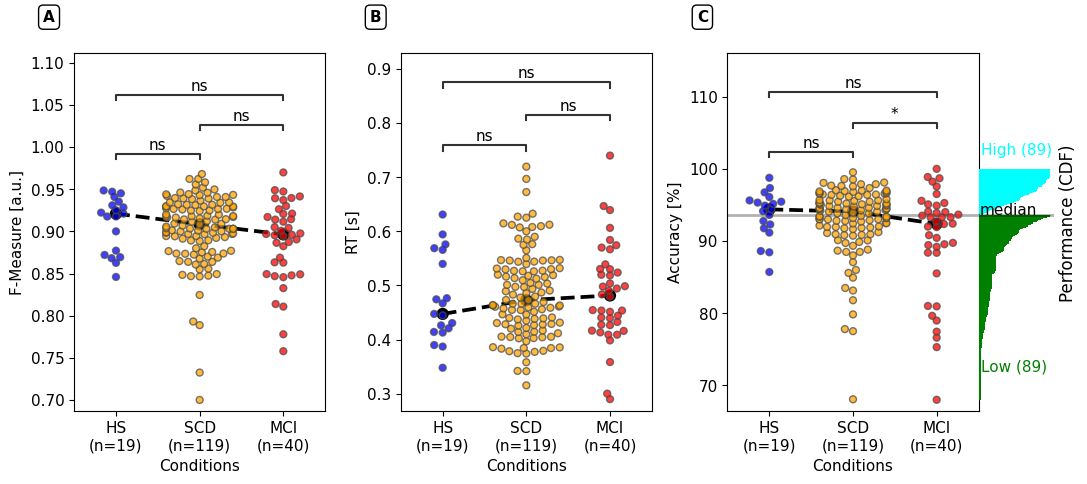

In [33]:
prefixes = ['TCVT']
suffixes = ['FMEASURE', 'RT', 'ACC']
FEATS = [f"{prefix}_{suffix}" for prefix in prefixes for suffix in suffixes]
nrows = len(prefixes)
ncols = len(suffixes)
df_plot = df_merge#_cleaned
# Calculate sample sizes and sex counts
sample_sizes = df_plot.groupby('Conditions').size()

fig, ax = plt.subplots(1, ncols, figsize=(11, 5), sharex=False)
#plt.subplots_adjust(wspace=0.75, hspace=1)
ax = ax.flatten()
order=['HS', 'SCD', 'MCI']
palette=[colors_HS[0],colors_SCD[0],colors_MCI[0]]
for idx, feat in enumerate(FEATS):

    
    r, p = scipy.stats.spearmanr(df_plot['Corrected_Age'], df_plot[feat])
    p_=p if 0.0001<p<0.05 else 'p<0.0001'
    #ax[idx].set_title(f'Age covariate (r={round(r,2)}, p={p_})')
   #sns.pointplot(data=df_merge, x='Conditions', hue='Sex', y=feat, ax=ax[idx], order=['HS', 'SCD', 'MCI'], palette=[])


    xx=sns.swarmplot(data=df_plot, x='Conditions', 
                  y=feat, 
                  #inner=None,
                  linewidth=1,
                  palette=palette, 
                  ax=ax[idx], order=order)
    for violin, alpha in zip(xx.collections[::1], [.75, .75, .75]):
        violin.set_alpha(alpha)

    
    sns.pointplot(data=df_plot, x='Conditions', y=feat, 
                  color='k', linestyles='--', ci=0,
                  ax=ax[idx], order=order, 
                  estimator=np.median)#,  palette=['r', 'purple', 'brown']) 
    add_stat_annotation(ax[idx], data=df_plot, x='Conditions', y=feat,  order=['HS', 'SCD', 'MCI'],
                                box_pairs=[('HS', 'SCD'), 
                                           ('SCD', 'MCI'), 
                                           ('MCI', 'HS')],
                                text_format='star',
                                test='Kruskal', loc='inside', comparisons_correction='bonferroni', verbose=2)
        

   # Extract text from tick labels and add sample sizes and sex counts
    tick_labels = [label.get_text() for label in ax[idx].get_xticklabels()]
    new_tick_labels = []
    for label in tick_labels:
        total_count = sample_sizes[label]
        new_label = f'{label}\n(n={total_count})'
        new_tick_labels.append(new_label)
    ax[idx].set_xticklabels(new_tick_labels)
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))
    
    if idx == 1 or idx == 1+ncols:
        ax[idx].set_ylabel('RT [s]')
    if idx == 2 or idx == 2+ncols:
        ax[idx].set_ylabel('Accuracy [%]')
    if idx == 0 or idx == 0+ncols:
        ax[idx].set_ylabel('F-Measure [a.u.]')

    if idx==2: 
        ax2=ax[idx].inset_axes([1, 0, 0.3, 1])
        sns.histplot(data=df_plot[df_plot['TCVT_Performance']=='Low'], y='TCVT_ACC', ax=ax2, cumulative=True, fill=False, color='green', binwidth=0.0014)#, bins=10)
        sns.histplot(data=df_plot[df_plot['TCVT_Performance']=='High'], y='TCVT_ACC', ax=ax2, cumulative=True, fill=False, color='cyan', binwidth=0.0014)#, bins=10)
    
        ax2.set_ylim(ax[idx].get_ylim())
        ax2.axis('off')
        ax2.axhline(y=np.median(df_plot['TCVT_ACC']), c='k', linewidth=2, alpha=.3)
        ax[idx].axhline(y=np.median(df_plot['TCVT_ACC']), c='k',linewidth=2, alpha=.3)
        ax2.text(y=np.median(df_plot['TCVT_ACC'])+0.002, x=1.1, s='median', c='k')
        ax2.text(y=np.median(df_plot['TCVT_ACC'])-(0.115*100), x=100, s='Performance (CDF)', c='k', rotation='vertical', fontsize=12)
    
        ax2.text(y=72, x=3, s=f'Low ({np.sum(df_plot['TCVT_Performance']=='Low')})', c='green')
        ax2.text(y=102, x=3, s=f'High ({np.sum(df_plot['TCVT_Performance']=='High')})', c='cyan')
    

fig.tight_layout()

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_behaviour_.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

## erp

In [34]:

def compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, titleLegend_):
    
    dfplot = df_erpPlot
    titleLegend =  f'{titleLegend_} \n(n={dfplot.shape[0]})' 
    
    #colors = ['b', 'r', 'orange'] if mainFeat=='Conditions' else ['brown', 'yellow']
    
    order = np.sort(list(np.unique(dfplot[mainFeat])))
    labelList = order
    
    times = np.stack(dfplot['TCVT_TIMES'])[0]#.iloc[0].astype(float)  
    
    maskTime = np.logical_and(times>tmin, times<tmax)
    
    for i, level in tqdm(enumerate(labelList)): # 'High', 'Low'
        print(level, colors[i])
        mean = np.mean(np.mean(np.stack(dfplot['TCVT_ERP'])[:, Q[q]][:, :, :], axis=1)[:, maskTime][dfplot[mainFeat]==level], axis=0)        
        sem = scipy.stats.sem(np.mean(np.stack(dfplot['TCVT_ERP'])[:, Q[q]][:, :, :], axis=1)[:, maskTime][dfplot[mainFeat]==level], axis=0)      
        ax.plot(times[maskTime]*1e3, mean, label=f'{level} (n={sum(dfplot[mainFeat]==level)})',linewidth=2.5, color=colors[i])
        ax.errorbar(times[maskTime]*1e3, y=mean, yerr=sem, alpha=0.05*1.5, c='k')
        ax.legend()
        if q == 'Q10':
            X = [90, 155, 180,]
            Y = [2.1, -5.5, 2.1]
            S = ['P1', 'N1', 'P2']
        else:
            X = [400, 600, 850]
            Y = [1.8, 1.7, 1.5]
            S = ['P300', 'P600', 'P900']
        for x, y, s in zip(X, Y,S):
            ax.text(x=x, y=y, s=s, fontsize=14)
        
    # Configurazione del grafico
    ax.set_xlabel('Time from stimulus onset [$\mathrm{ms}$]')
    ax.set_ylabel('Potential [$\mu$V]')
    qchannel = '(PO7, PO8, O1, Oz, O2)' if q=='Q10' else '(FC1, FCz, FC2, C1, Cz, C2)'
    qphase = 'Encoding' if q=='Q10' else 'Decision'
    tchannel = 'occipital' if q=='Q10' else 'central'
        
    # Posizionamento della legenda fuori dal grafico
    ax.legend(title=titleLegend, loc=loc)#, bbox_to_anchor=(0.76, 0.155))
    ax.axhline(y=0, c='k', linewidth=1)
    ax.set_xlim(tmin*1e3, tmax*1e3)
    ax.set_ylim(vmin, vmax)
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='gray')
    
    do_stats=do_stat
    if do_stats:
        
        levels_=list(np.unique(dfplot[mainFeat]))
        if len(levels_) == 3:
            pvalue = []
            hvalue = []
            for t in range(times[maskTime].shape[0]):
                group1 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[0]][:, :, maskTime][:, :, t].ravel()
                group2 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[1]][:, :, maskTime][:, :, t].ravel()
                group3 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[2]][:, :, maskTime][:, :, t].ravel()
                h, p_ = scipy.stats.kruskal(group1, group2, group3)
                pvalue += [p_]
                hvalue += [h]

        if len(levels_) == 2:
            pvalue = []
            hvalue = []

            for t in range(times[maskTime].shape[0]):
                group1 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[0]][:, :, maskTime][:, :, t].ravel()
                group2 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[1]][:, :, maskTime][:, :, t].ravel()
                h, p_ = scipy.stats.kruskal(group1, group2)
                pvalue += [p_]
                hvalue += [h]
        
        do_corr=True
        if do_corr:
            _, pvalue, _, _ = statsmodels.stats.multitest.multipletests(pvalue, 
                                                                       alpha=0.05,
                                                                       method='fdr_bh', 
                                                                       is_sorted=False, 
                                                                       returnsorted=False)
            if len(levels_) == 3:
                pvalue_phoc = []

                for t in range(len(times[maskTime][pvalue < 0.05])):
                    groups_phoc = [np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat] == levels_[i]][:, :, maskTime][:, :, pvalue < 0.05][:, :, t].ravel() for i in range(len(levels_))]
                    p_12, p_13, p_23 = [scipy.stats.kruskal(groups_phoc[i], groups_phoc[j])[1] for i in range(len(levels_)) for j in range(i+1, len(levels_))]
                    pvalue_phoc.append([times[maskTime][pvalue < 0.05][t], min(p_12*3,1), min(p_13*3,1), min(p_23*3,1)])
                pvalue_phoc = pd.DataFrame(pvalue_phoc, columns=['t', f'p_{levels_[0]}_{levels_[1]}', f'p_{levels_[0]}_{levels_[2]}', f'p_{levels_[1]}_{levels_[2]}'])

            else:
                pvalue_phoc=0
                
        axStat = ax.inset_axes([0, 1.05, 1, 0.1])
        axStat.set_xticklabels(' ')
        axStat.set_ylabel('p')
        axStat.set_xlim(ax.get_xlim())
        axStat.set_yticklabels(' ')
        axStat.twinx().set_yticks([0,1])
        axStat.plot(times[maskTime]*1e3, pvalue, c='k')
        for i in np.where(pvalue<0.05)[0]:
            if times[maskTime][i]*1e3>=50: ax.axvline(x=times[maskTime][i]*1e3, c='violet', alpha=0.15)

        axStat_ = axStat.inset_axes([0, 1.5, 1, 1])
        axStat_.set_xticklabels(' ')
        axStat_.set_ylabel('H')
        axStat_.set_xlim(ax.get_xlim())
        axStat_.set_yticklabels(' ')
        axStat_.twinx().set_yticks([0,75])
        axStat_.set_ylim(0,75)
        axStat_.plot(times[maskTime]*1e3, hvalue, c='k')       
    
        print('1', np.sort(times[maskTime][list(np.where([np.diff((pvalue<0.05)*1)==1])[1])]*1e3))
        print('-1', np.sort(times[maskTime][list(np.where([np.diff((pvalue<0.05)*1)==-1])[1])]*1e3))

    if do_scalp:
    
        axScalp = ax.inset_axes([0.05, 0.05, 0.2, 0.25])
        sns.scatterplot(data=df_scalp, x='X', y='Y', color='k', edgecolor=None, ax=axScalp, s=20)
        selected_chans = df_scalp.loc[Q[q], ['X', 'Y']]
        axScalp.scatter(selected_chans['X'], selected_chans['Y'], color='r', edgecolor='k', s=20)
        axScalp.axis('off')
    
    ax.annotate(letter, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))

    return pvalue, pvalue_phoc




### conditions

['b', 'red', 'orange']


0it [00:00, ?it/s]

HS b
MCI red
SCD orange
1 [17.578125 54.6875   91.796875]
-1 [  5.859375  31.25      82.03125  191.40625 ]
p_HS_MCI had p<0.05 from 91.79688 to 187.5 for 75.51[%]
p_HS_SCD had p<0.05 from 54.6875 to 82.03125 for 57.14[%]
p_HS_SCD had p<0.05 from 91.79688 to 187.5 for 100.0[%]
p_MCI_SCD had p<0.05 from 54.6875 to 82.03125 for 100.0[%]
p_MCI_SCD had p<0.05 from 91.79688 to 187.5 for 59.18[%]
['b', 'red', 'orange']


0it [00:00, ?it/s]

HS b
MCI red
SCD orange
1 [333.984375]
-1 []
p_HS_MCI had p<0.05 from 333.0 to 999.0 for 64.41[%]
p_HS_SCD had p<0.05 from 333.0 to 999.0 for 90.59[%]
p_MCI_SCD had p<0.05 from 333.0 to 999.0 for 41.47[%]


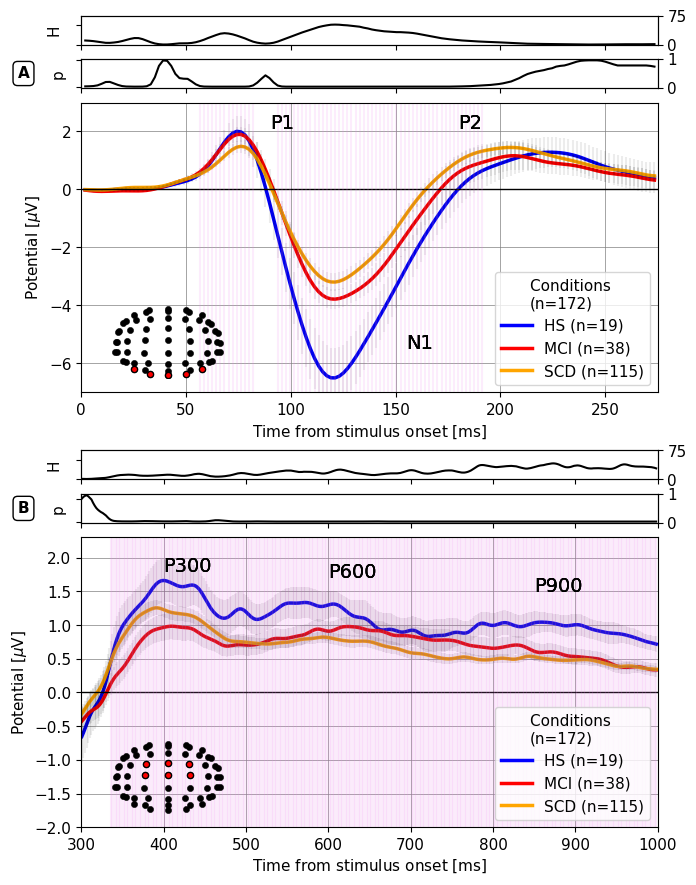

In [35]:
# multiplot

grouping = 'Conditions'
df_erpPlot = df_merge_cleaned
pvalues = []

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 2.3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [[colors_HS[0], colors_MCI[0], colors_SCD[0]]]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                             mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax,
                                             grouping)

    tph=pvalue_phoc['t']
    for m in ['p_HS_MCI', 'p_HS_SCD', 'p_MCI_SCD']:
        if q=='Q10':
            for timing in [[0.0546875, 0.08203125],[0.09179688, 0.1875]]:
                tmask = np.logical_and(tph>=timing[0], tph<=timing[1])
                perc = round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)
                if perc>0:
                    print(f'{m} had p<0.05 from {timing[0]*1000} to {timing[1]*1000} for {round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)}[%]')
        if q=='Q5':
            for timing in [[0.333, 0.999],[0,0]]:
                tmask = np.logical_and(tph>=timing[0], tph<=timing[1])
                if sum(tmask)!=0:
                    perc = round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)
                    print(f'{m} had p<0.05 from {timing[0]*1000} to {timing[1]*1000} for {round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)}[%]')
        
fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)  

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

['red', 'orange']


0it [00:00, ?it/s]

MCI red
SCD orange
1 []
-1 []
['red', 'orange']


0it [00:00, ?it/s]

MCI red
SCD orange
1 [332.03125  736.328125 769.53125  863.28125 ]
-1 [390.625    755.859375 837.890625 892.578125]


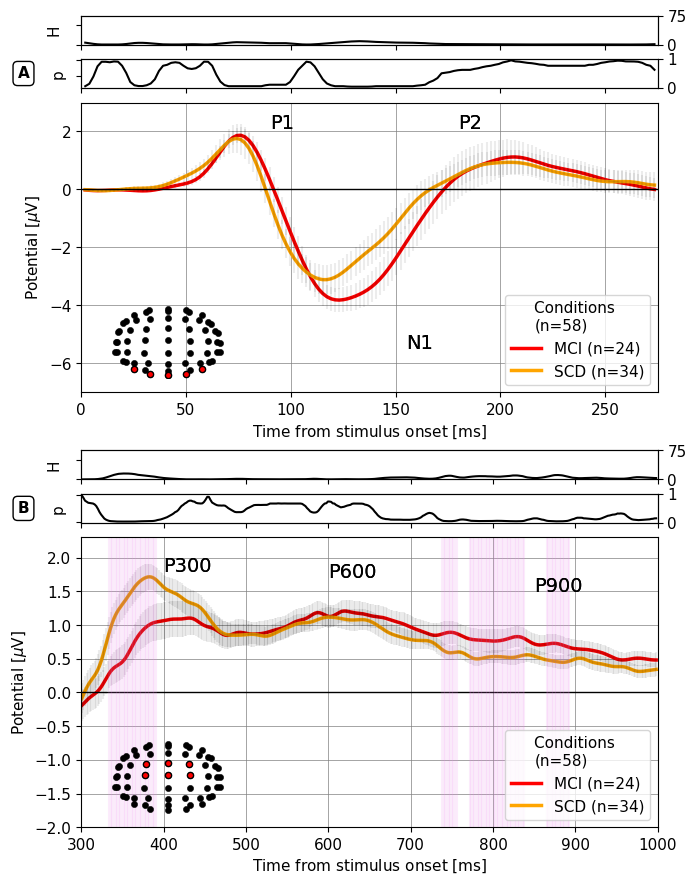

In [36]:
# multiplot

grouping = 'Conditions'
df_erpPlot = df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown']
pvalues = []

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 2.3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [[colors_MCI[0], colors_SCD[0]]]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                             mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax,
                                             grouping)

        
fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)  

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}_ATN.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### performance

In [37]:
# multiplot

grouping = 'TCVT_Performance'
df_erpPlot = df_merge_cleaned
pvalues = []

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.35, 1],
                            [-6, -2],
                            [3, 2.8],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [['cyan', 'green'],['cyan', 'green']],
                            [df_merge[~df_merge['ID_DONGNOCCHI'].isin(elementi_ripetuti)]]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                             mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax,
                                             'Performance')
fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)  

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 [72.265625]
-1 [101.5625]
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 [546.875    951.171875]
-1 [310.546875 714.84375  964.84375 ]


HS
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 [ 37.109375 103.515625]
-1 [ 44.921875 111.328125]
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 [498.046875 839.84375 ]
-1 [470.703125 511.71875  851.5625  ]
SCD
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 []
-1 []
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 [359.375   429.6875  496.09375]
-1 [306.640625 427.734375 449.21875  750.      ]
MCI
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 []
-1 []
['cyan', 'green']


0it [00:00, ?it/s]

High cyan
Low green
1 []
-1 []


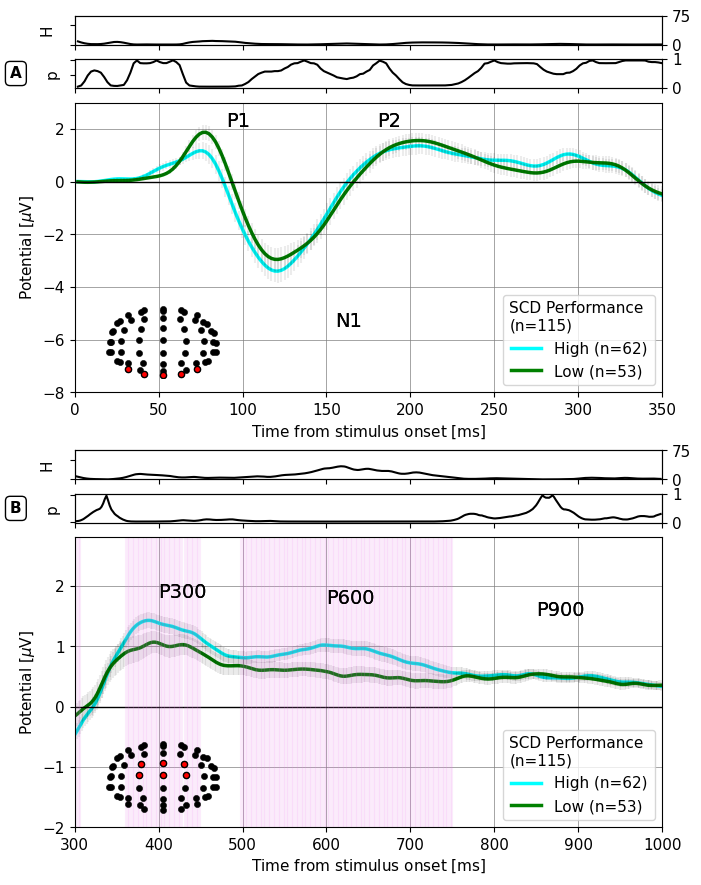

In [38]:
# multiplot

grouping = 'TCVT_Performance'
pvalues = []

for mask in ['HS', 'SCD', 'MCI']:
    print(mask)
    df_erpPlot = df_merge_cleaned
    df_erpPlot=df_erpPlot[df_erpPlot['Conditions']==mask]
    if mask=='HS': colors_ = colors_HS[1:3]#['royalblue', 'lightsteelblue']
    if mask=='SCD': colors_ = colors_HS[1:3]#['darkorange','gold']
    if mask=='MCI': colors_ = colors_HS[1:3]#['orangered','lightsalmon']
        
    fig, ax = plt.subplots(2,1, figsize=(7, 9))
    
    for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, mask_ in zip(
                                ['Q10', 'Q5'],
                                [0, 0.3],
                                [0.35, 1],
                                [-8, -2],
                                [3, 2.8],
                                ['A', 'B'],
                                ['lower right']*2,
                                [grouping]*2,
                                [True]*2,
                                [True]*2,
                                [colors_]*2,
                                [df_erpPlot]*2,
                                [ax[0], ax[1]], [mask]*2 
                                ):
        print(colors)
        pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                                 mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, f'{mask} Performance')
    
    fig.tight_layout()
    plt.subplots_adjust(wspace=1, hspace=0.5)  
    
    for f in ['png', 'pdf']:
        now = datetime.now()
        date = now.strftime("%Y%m%d%H%M%S")
        nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}_{mask}.{f}'
        plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn

['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 []
-1 []
['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 []
-1 []


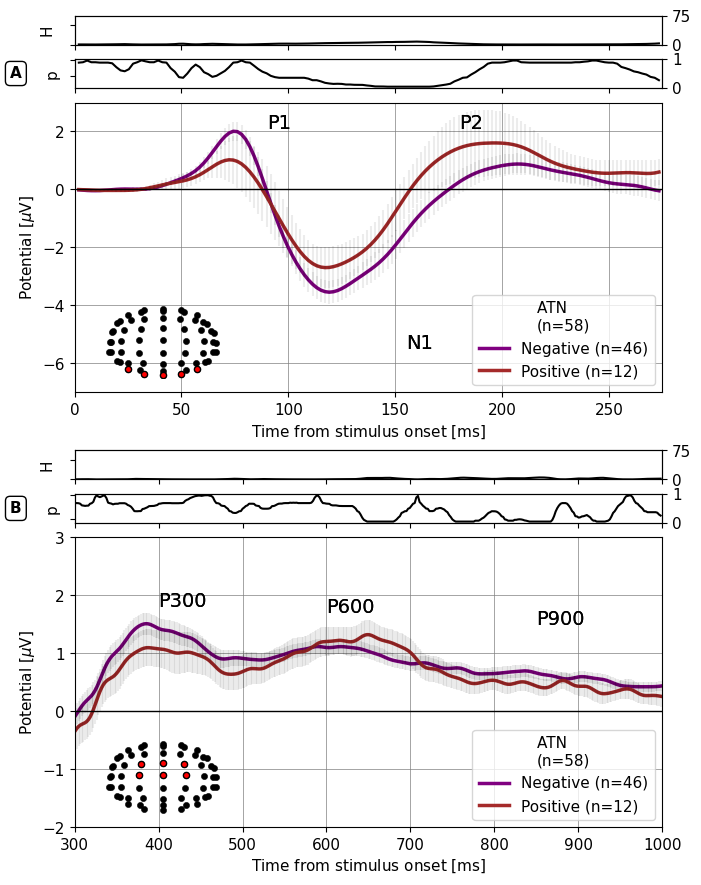

In [39]:
# multiplot

grouping = 'ATN'
pvalues = []
note = 'nan'
mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter,
                                             loc, mainFeat, do_stat, do_scalp, 
                                             colors, df_erpPlot, ax,
                                             f'ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)   

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn-scd

['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 [123.046875]
-1 [144.53125]
['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 []
-1 []


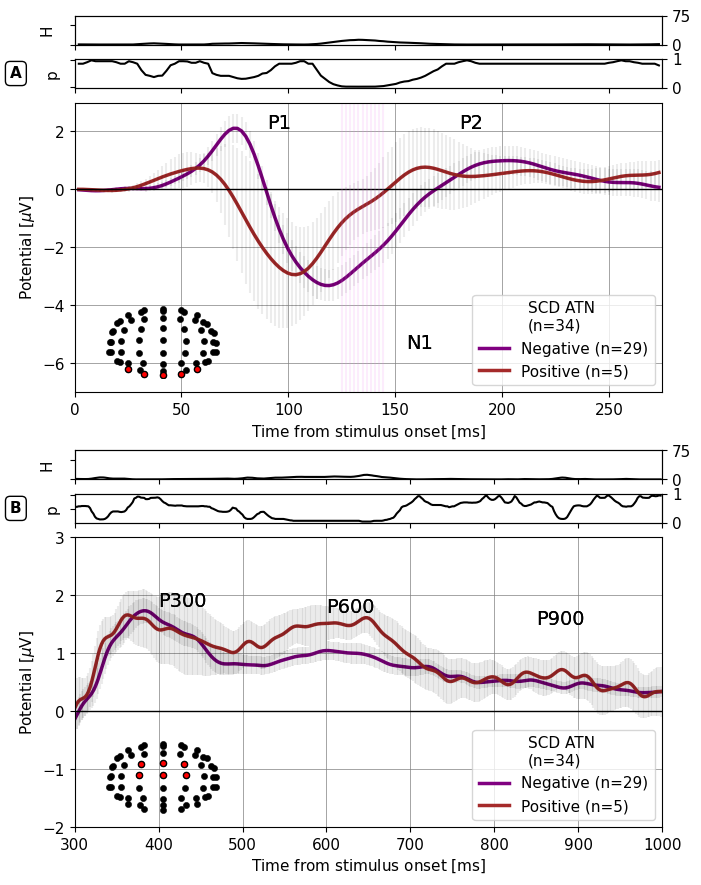

In [40]:
# multiplot

grouping = 'ATN-SCD'
SCD = df_merge_cleaned['Conditions']=='SCD'
pvalues = []
note = 'nan'
mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask][SCD]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter,
                                             loc, mainFeat, do_stat, do_scalp,
                                             colors, df_erpPlot, ax,
                                             f'SCD ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)    
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn-mci

['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 []
-1 []
['purple', 'brown', 'k']


0it [00:00, ?it/s]

Negative purple
Positive brown
1 [476.5625   750.       986.328125]
-1 [591.796875 945.3125  ]


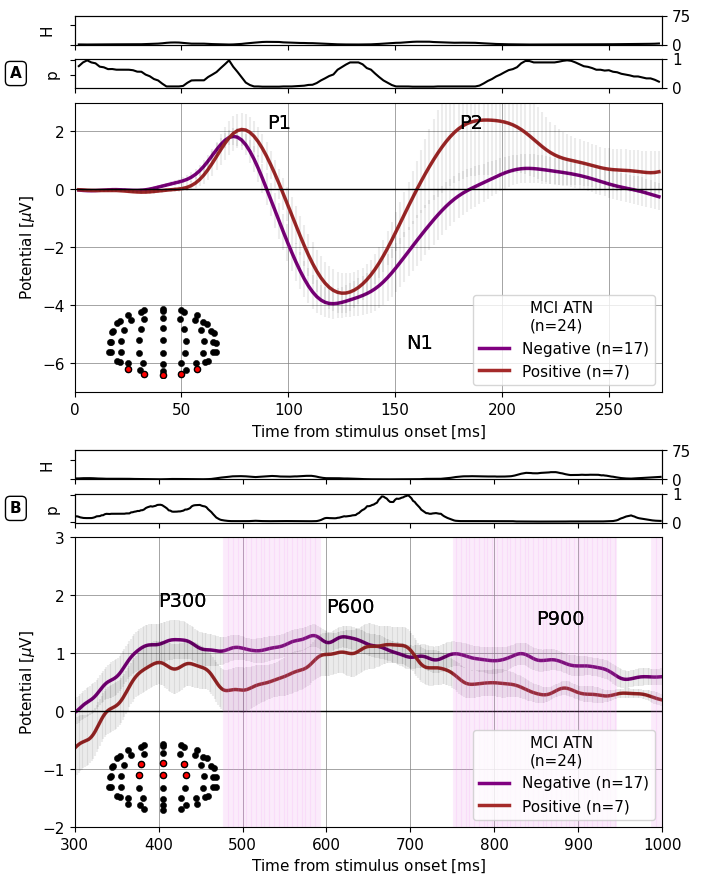

In [41]:
# multiplot

grouping = 'ATN-MCI'
pvalues = []
note = 'nan'

mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask][MCI]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, 
                                             letter, loc, mainFeat, do_stat, 
                                             do_scalp, colors,
                                             df_erpPlot, ax,
                                             f'MCI ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)    
now = datetime.now()
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

## FC occipital

In [42]:
def plotTopoPaper(data, ax, cmap, vlim=(-2,1.5)):
    im, cn = mne.viz.plot_topomap(data,
                    outlines='head',
                    mask_params=dict(marker='o', 
                                    markerfacecolor='w', 
                                    markeredgecolor='k',
                                    linewidth=0, markersize=4),
                                  size=1, 
                    axes=ax,
                    sensors=False,
                    pos=coordinates[:, 0:2],
                    vlim=vlim,
                    cmap=cmap, 
                    mask=np.isin(np.arange(0,61), Q10),
                    show=False,
                    contours=2)
    return im, cn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=5.921e-02 stat=5.435e+00
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.931e-02 stat=6.155e+00
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.035e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SCD_Low v.s. SCD_High: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.874e-02
HS_Low v.s. HS_High: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.341e-01
MCI_Low v.s. MCI_High: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.805e-01
p-value annotation legend:
ns: 

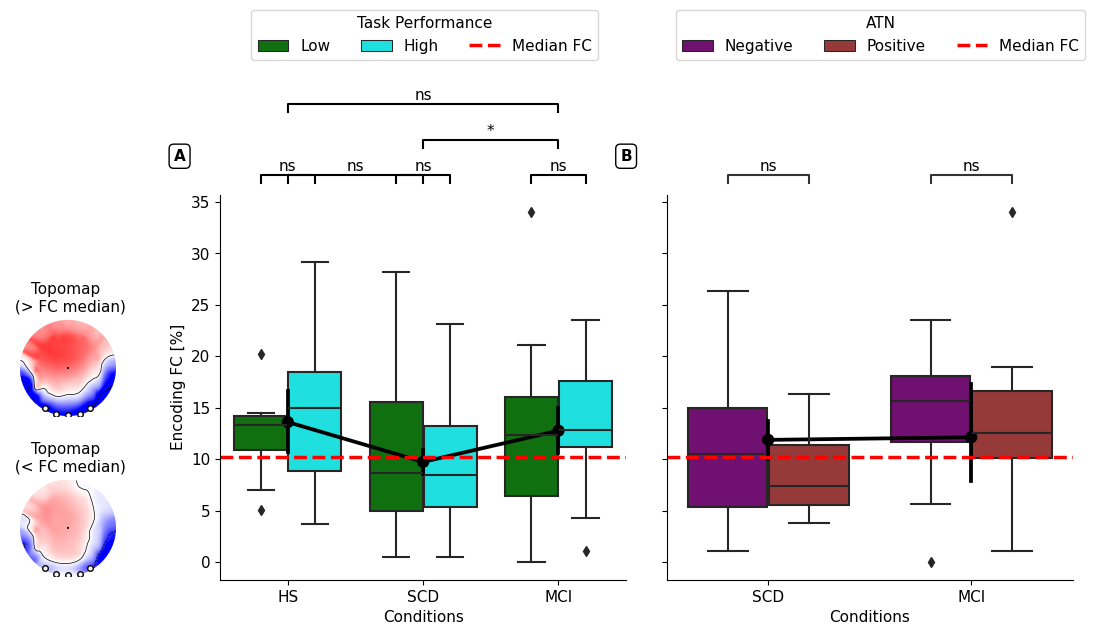

In [43]:
fig, ax = plt.subplots(1,2, figsize=(11, 5), sharey=True)
ax = ax.flatten()

xx=sns.boxplot(
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            hue='TCVT_Performance',
            palette=['green', 'cyan'],
            hue_order=['Low', 'High'],
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI']
)
sns.pointplot(
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI']
)
test_results = add_stat_annotation(          
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI'],
            box_pairs=[
            ('HS', 'SCD'),
            ('SCD', 'MCI'),
            ('MCI', 'HS')
            ],
            text_format='star', comparisons_correction='bonferroni',
            test='Kruskal', loc='outside', verbose=2
)
test_results = add_stat_annotation(          
            data=df_merge_cleaned, 
            hue='TCVT_Performance',
            ax=ax[0],
            color='k',
            hue_order=['Low', 'High'],
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI'],
            box_pairs=[
            (('HS', 'Low'),('HS', 'High')),
            (('SCD', 'Low'),('SCD', 'High')),
            (('MCI', 'Low'),('MCI', 'High'))
            ],
            text_format='star', comparisons_correction='bonferroni',
            test='Kruskal', loc='outside', verbose=2
)

# ATN
x='ATN'
sns.pointplot(
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        ax=ax[1],
        x=x, 
        color='k',
        order=['Negative', 'Positive'],
        y='TCVT_OSFC_REL_O'
)
sns.boxplot(
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        hue=x,
        x ='Conditions',
        palette=['purple', 'brown'],
        hue_order=['Negative', 'Positive'],
        ax=ax[1],
        order=['SCD', 'MCI'],
        y='TCVT_OSFC_REL_O'
)
test_results = add_stat_annotation(
        ax[1], 
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        x='Conditions',
        y='TCVT_OSFC_REL_O',
        order=['SCD', 'MCI'],
        hue=x,
        hue_order=['Negative', 'Positive'],
        box_pairs=[
            (('SCD', 'Negative'), ('SCD', 'Positive')),
            (('MCI', 'Positive'), ('MCI', 'Negative'))  
                  ],
        text_format='star', comparisons_correction='bonferroni',
        test='Kruskal', loc='outside', verbose=2
)


#ax[0].set_ylim(-0.5, 27.5)
ax[1].set_ylabel(' ')
ax[0].set_ylabel('Encoding FC [%]')

# median
ax[0].axhline(np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), c='r', label='Median FC', linestyle='--', linewidth=2.5)
ax[1].axhline(np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), c='r', label='Median FC', linestyle='--', linewidth=2.5)

#topomap
k=0.2
VLIMS=(-5*k,5*k)

times=df_merge_cleaned['TCVT_TIMES'].iloc[0]
cmap = 'bwr'
medfc=np.logical_and(df_merge_cleaned['TCVT_OSFC_REL_O']>0,
                     df_merge_cleaned['TCVT_OSFC_REL_O']<np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.55))
ax0=ax[0].inset_axes([-0.5, 0.01, 0.25, 0.25])
dataLOWFC=np.mean(np.mean(np.stack(df_merge_cleaned['TCVT_ERP'])[medfc][:, :, np.logical_and(times>0.05, times<0.2)],axis=0), axis=1)
ax0.set_title('Topomap \n (< FC median)')
plotTopoPaper(dataLOWFC, ax0, cmap, vlim=VLIMS)
medfc=np.logical_and(df_merge_cleaned['TCVT_OSFC_REL_O']>np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), 
             df_merge_cleaned['TCVT_OSFC_REL_O']<np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 1))
ax1=ax[0].inset_axes([-0.5, 0.425, 0.25, 0.25])
dataHIGHFC=np.mean(np.mean(np.stack(df_merge_cleaned['TCVT_ERP'])[medfc][:, :, np.logical_and(times>0.05, times<0.2)],axis=0), axis=1)
plotTopoPaper(dataHIGHFC, ax1, cmap, vlim=VLIMS)
ax1.set_title('Topomap \n (> FC median)')

ax[0].legend(title='Task Performance', ncols=3, bbox_to_anchor=(0.95,1.5))
ax[1].legend(title=x, ncols=3, bbox_to_anchor=(1.05, 1.5))

#ax[1].legend().set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.subplots_adjust(wspace=0.1)

# letters
for i, l in enumerate(['A', 'B']):
    ax[i].annotate(l, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
        va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
        edgecolor='k', boxstyle='round,pad=0.3'))

# savefig
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_FC_ENCODING_withPerf.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)


#
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][HS], df_merge_cleaned['Corrected_Age'][HS])
print('HS', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][SCD], df_merge_cleaned['Corrected_Age'][SCD])
print('SCD', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][MCI], df_merge_cleaned['Corrected_Age'][MCI])
print('MCI', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][ATNP], df_merge_cleaned['Corrected_Age'][ATNP])
print('ATNP', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][ATNN], df_merge_cleaned['Corrected_Age'][ATNN])
print('ATNN', r,p)

### correlations

In [44]:
features_to_check = ['NFL', 'Corrected_Age', 'Age at onset',  
                     'SOCIALI media', 'INTELLET media', 'FISICHE media',
                     'TIB', 'MMSE', 'Education', 'TCVT_FMEASURE', 'TCVT_ACC', 'TCVT_RT'] + FEATURES['BIOMARKER']
for feat in features_to_check:
    valid_data = df_merge_cleaned[['TCVT_OSFC_REL_O', feat]].loc[SCD + MCI].dropna()
    r, p = scipy.stats.spearmanr(valid_data['TCVT_OSFC_REL_O'], valid_data[feat], nan_policy='omit')
    print(feat, r, p)


NFL -0.0420399374262385 0.6058760310314131
Corrected_Age 0.024611494501711514 0.7626699210337141
Age at onset -0.04416630517311122 0.5877554741058555
SOCIALI media -0.14924251048945253 0.0655901278897613
INTELLET media 0.004152039874326531 0.9593757712180786
FISICHE media -0.041326843844087316 0.612007848953951
TIB -0.12785790697297722 0.11525259005117201
MMSE -0.09040023109977212 0.2664409023627572
Education -0.12821059884492914 0.11424490914692961
TCVT_FMEASURE 0.1271939377401172 0.11716838813286493
TCVT_ACC -0.04740455675364202 0.5606470994806307
TCVT_RT -0.13065567841577685 0.10744668988255027
ABeta -0.13423740738145837 0.3107581684339163
Ab142Ab140 -0.10188067878705329 0.4507851409731384
Tau -0.09016118001956662 0.4970690616383634
P-Tau -0.03482594335486511 0.793430125310357
NFL -0.0420399374262385 0.6058760310314131


## features

In [45]:
for feat in FEATURES['NEURAL']:
    df_merge_cleaned[f'{feat}_mean_Z'] = scipy.stats.zscore(df_merge_cleaned[f'{feat}_mean'])
    df_merge_cleaned[f'{feat}_mean_ZSCD'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][SCD])) / np.mean(df_merge_cleaned[f'{feat}_mean'][SCD])
    df_merge_cleaned[f'{feat}_mean_ZMCI'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][MCI])) / np.mean(df_merge_cleaned[f'{feat}_mean'][MCI])
    df_merge_cleaned[f'{feat}_mean_ZHS'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][HS])) / np.mean(df_merge_cleaned[f'{feat}_mean'][HS])


### tablemap

In [46]:
tab = []

for feat in FEATURES['NEURAL']:
    refHS = np.mean(np.stack(df_merge_cleaned[HS][feat]))
    refSCD = np.mean(np.stack(df_merge_cleaned[SCD][feat]))
    refMCI = np.mean(np.stack(df_merge_cleaned[MCI][feat]))
    refMCIHIGH = np.mean(np.stack(df_merge_cleaned[MCI][HP][feat]))
    refSCDHIGH = np.mean(np.stack(df_merge_cleaned[SCD][HP][feat]))
    refHSHIGH = np.mean(np.stack(df_merge_cleaned[HS][HP][feat]))


    for i in range(df_merge_cleaned.shape[0]):
        tab.append({'feat': feat, 
                    'featName': feat.split(sep='_')[1],
                    'featType': feat.split(sep='_')[2],
                    'featLocus': feat.split(sep='_')[3],
                    'id': df_merge_cleaned['ID_DONGNOCCHI'].iloc[i],
                    'mmse': df_merge_cleaned['MMSE'].iloc[i],
                    'ls_int': df_merge_cleaned['INTELLET media'].iloc[i],
                    'ls_soc': df_merge_cleaned['SOCIALI media'].iloc[i],
                    'ls_fis': df_merge_cleaned['FISICHE media'].iloc[i],
                    'nfl': df_merge_cleaned['NFL'].iloc[i],
                    'age': df_merge_cleaned['Corrected_Age'].iloc[i],
                    'ageOnset': df_merge_cleaned['Age at onset'].iloc[i],
                    'education': df_merge_cleaned['Education'].iloc[i],
                    'osfc': df_merge_cleaned['TCVT_OSFC_REL_O'].iloc[i],
                    'tib': df_merge_cleaned['TIB'].iloc[i],
                    'SOCIALI media': df_merge_cleaned['SOCIALI media'].iloc[i],
                    'INTELLET media': df_merge_cleaned['INTELLET media'].iloc[i],
                    'FISICHE media': df_merge_cleaned['FISICHE media'].iloc[i],
                    'valuesRefHS': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refHS)*100)-100,
                    'valuesRefSCD': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refSCD)*100)-100,
                    'valuesRefMCI': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refMCI)*100)-100,

                    'valuesZ': df_merge_cleaned[f'{feat}_mean_Z'].iloc[i],       
                    'valuesZSCD': df_merge_cleaned[f'{feat}_mean_ZSCD'].iloc[i],       
                    'valuesZHS': df_merge_cleaned[f'{feat}_mean_ZHS'].iloc[i],       
                    'valuesZMCI': df_merge_cleaned[f'{feat}_mean_ZMCI'].iloc[i],       

                    'values': np.mean(df_merge_cleaned[feat].iloc[i]),
                    'cond': df_merge_cleaned['Conditions'].iloc[i],
                    'atn': df_merge_cleaned['ATN'].iloc[i],
                    'perf': df_merge_cleaned['TCVT_FMEASURE'].iloc[i],
                    'perfCat': df_merge_cleaned['TCVT_Performance'].iloc[i]})

tab = pd.DataFrame(tab)
#tab = tab[abs(scipy.stats.zscore(tab['valuesRef']))<3]

tabscd = tab['cond']=='SCD'
tabmci = tab['cond']=='MCI'
tabhs = tab['cond']=='HS'
tablow = tab['perfCat']=='Low'
tabhigh = tab['perfCat']=='High'
tabint = tab['featType']=='INTEGRAL'
tablat = tab['featType']=='LAT'
tabpeak = tab['featType']=='PEAK'


In [47]:
def computeLine(y, ax, tab, tabmci):
    import math
    # Calcola le medie per le condizioni
    SCDmean = np.mean(tab[y][tab['cond'] == 'SCD'])
    HSmean = np.mean(tab[y][tab['cond'] == 'HS'])
    MCImean = np.mean(tab[y][tab['cond'] == 'MCI'])
    
    # Punti x e y
    x1, y1 = 0, HSmean
    x2, y2 = 1, SCDmean
    x3, y3 = 2, MCImean
    
    # Calcola la pendenza
    m = (y2 - y1) / (x2 - x1)
    # Calcola l'intercetta
    q = y1 - m * x1
    
    # Calcola y3 sulla retta
    y3_on_line = m * x3 + q
    
    # Traccia la retta
    x_vals = np.array([x1, x2, x3])
    y_vals = m * x_vals + q
    ax.plot(x_vals, y_vals, label='Linea dei punti', color='red', linestyle='--')
    
    
    mci_theretical_mean=y3_on_line
    print(mci_theretical_mean)
    
    #Coordinate dei punti
    x2, y2 = 1, SCDmean
    x3, y3 = 2, y3_on_line
    
    # Calcola le differenze
    delta_y = y3 - y2
    delta_x = x3 - x2
    
    # Inizializza la lista
    angle = []
    
    # Itera sui valori della condizione 'MCI'
    for i in range(tabmci.shape[0]):
        angle.append(math.degrees(math.atan2(tabmci[y].iloc[i] - SCDmean, 1)))
    
    tabmci['phi']=angle

    tabmci['phi']>np.mean(tabmci['phi'])
    tabmci['phi_cat'] = np.where(tabmci['phi'] > np.mean(tabmci['phi']), 'phi_plus', 'phi_minus')
    
    return tabmci['phi'], tabmci['phi_cat']


def calculate_second_point(x1, y1, angle_degrees, distance):
    import math
    # Converti l'angolo da gradi a radianti
    angle_radians = math.radians(angle_degrees)
    
    # Calcola le coordinate del secondo punto
    x2 = x1 + distance * math.cos(angle_radians)
    y2 = y1 + distance * math.sin(angle_radians)
    
    return x2, y2

In [48]:
tab

feat featName  featType featLocus   id  mmse  ls_int  \
0            TCVT_P1_LAT_O       P1       LAT         O    1  26.2    19.2   
1            TCVT_P1_LAT_O       P1       LAT         O    2  30.0    19.4   
2            TCVT_P1_LAT_O       P1       LAT         O    3  24.2    19.4   
3            TCVT_P1_LAT_O       P1       LAT         O    4  25.0    12.8   
4            TCVT_P1_LAT_O       P1       LAT         O    6  25.2    15.4   
...                    ...      ...       ...       ...  ...   ...     ...   
3091  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  184  27.0    19.4   
3092  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  185  27.0    19.4   
3093  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  186  27.0    19.4   
3094  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  188  27.0    19.4   
3095  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  189  27.0    19.4   

        ls_soc  ls_fis      nfl  ...  valuesRefMCI   valuesZ  valuesZSCD  \
0     9.800000     9.6  11.0500  ...      2.187509  0.091155    0.013701   
1     9.333333     6.5  16.9500  ...     -7.157295 -0.321424   -0.074847   
2     9.333333     6.5  22.8300  ...     43.562062  1.867191    0.394872   
3     2.600000     1.0  29.1500  ...    -36.213639 -1.554803   -0.339553   
4     3.800000     3.6  10.6600  ...     15.016016  0.644813    0.132526   
...        ...     ...      ...  ...           ...       ...         ...   
3091  9.333333     6.5  12.1548  ...    133.251300  0.871884    3.508885   
3092  9.333333     6.5  12.1548  ...    -74.334105 -0.375038   -0.994839   
3093  9.333333     6.5  12.1548  ...    -89.551142 -0.518226   -1.512017   
3094  9.333333     6.5  12.1548  ...     23.138618  0.268988    1.331301   
3095  9.333333     6.5  12.1548  ...   -152.729267 -0.870178   -2.783224   

      valuesZHS  valuesZMCI      values  cond       atn      perf  perfCat  
0      0.065159    0.016121   67.123318   SCD  Negative  0.916471      Low  
1     -0.027884   -0.072637   60.985051   SCD  Negative  0.864827     High  
2      0.465679    0.398203   94.300782   SCD  Positive  0.926649     High  
3     -0.306028   -0.337976   41.898978   SCD  Positive  0.945874     High  
4      0.190016    0.135231   75.549906   MCI  Negative  0.882450     High  
...         ...         ...         ...   ...       ...       ...      ...  
3091   0.472404    1.822977  159.850404   SCD   Unknown  0.934471      Low  
3092  -0.998315   -0.996769   17.589199   SCD   Unknown  0.940880      Low  
3093  -1.167202   -1.320570    7.160749   SCD   Unknown  0.898565     High  
3094  -0.238699    0.459609   84.388631   SCD   Unknown  0.824587      Low  
3095  -1.582323   -2.116462  -36.136110   SCD   Unknown  0.936545      Low  

[3096 rows x 30 columns]

In [49]:
y='valuesRefHS'
fig, ax = plt.subplots(1,3, figsize=(11,5))
ax = ax.flatten()
r, p = scipy.stats.spearmanr(tab[y], tab['age'])
print('all',r,p)
for idx, i in enumerate(['LAT', 'PEAK', 'INTEGRAL']):
    tab_ = tab[tab['featType']==i]
    #tab_ = tab_[abs(scipy.stats.zscore(tab_[y]))<3]
    r, p = scipy.stats.spearmanr(tab_[y], tab_['age'])
    print(i,r,p)
    
    xx = sns.barplot(
                data=tab_, 
                #inner=None,
                linewidth=1,
                palette=['b', 'orange', 'red'],
                x='cond', 
                order = ['HS', 'SCD', 'MCI'],
                y=y,
                estimator=np.mean,
                ax=ax[idx])
    for violin, alpha in zip(xx.collections[::1], [.75, .75, .75]):
        violin.set_alpha(alpha)
    sns.pointplot(
                  data=tab_, 
                  color='k',
                  x='cond', 
                  order = ['HS', 'SCD', 'MCI'],
                  y=y,
                  ci=0,
                  estimator=np.mean,
                  linestyles='--',
                  ax=ax[idx])
    test_results = add_stat_annotation(
                        ax=ax[idx],
                        data=tab_,
                        order=['HS', 'SCD', 'MCI'],
                        y=y,
                        x='cond',
                        text_format='star', 
                        comparisons_correction='bonferroni',
                        test='Kruskal', loc='outside', verbose=2,
                        box_pairs=[
                           ('HS', 'MCI'),('SCD', 'HS'),('MCI', 'SCD')
                             ])
    if i=='LAT': a = 'ERP Latency [%]'
    if i=='PEAK': a = 'ERP Peak [%]'
    if i=='INTEGRAL': a = 'ERP Integral [%]'
        
    ax[idx].set_ylabel(a)
 # Aggiungi lettere in alto a destra su ciascun plot
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))
    ax[idx].set_xlabel('Conditions')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_HSrelationFeats.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)




all -0.011716229653614203 0.5146139678216828
LAT -0.012238444061363367 0.6945445629732588
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.690e-01 stat=3.642e+00
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.456e-02
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.201e-01 stat=2.602e+00
PEAK -0.025649400326819838 0.41044113821057493
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.963e-03 stat=1.031e+01
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.545e-01
HS v.s. MCI: Kruskal-Wa

In [50]:
y='valuesRefHS'
fig, ax = plt.subplots(1,3, figsize=(11,5))
ax = ax.flatten()
r, p = scipy.stats.spearmanr(tab[y], tab['age'])
print('all',r,p)
for idx, i in enumerate(['LAT', 'PEAK', 'INTEGRAL']):
    tab_ = tab[tab['featType']==i]
    tab_ =  tab_[(tab_['atn']!=tab['atn'].unique()[2])]
    #tab_ = tab_[abs(scipy.stats.zscore(tab_[y]))<3]
    r, p = scipy.stats.spearmanr(tab_[y], tab_['age'])
    print(i,r,p)
    
    xx = sns.barplot(
                data=tab_, 
                #inner=None,
                linewidth=1,
                palette=['b', 'orange', 'red'],
                x='cond', 
                order = ['HS', 'SCD', 'MCI'],
                y=y,
                estimator=np.mean,
                ax=ax[idx])
    for violin, alpha in zip(xx.collections[::1], [.75, .75, .75]):
        violin.set_alpha(alpha)
    sns.pointplot(
                  data=tab_, 
                  color='k',
                  x='cond', 
                  order = ['HS', 'SCD', 'MCI'],
                  y=y,
                  ci=0,
                  estimator=np.mean,
                  linestyles='--',
                  ax=ax[idx])
    test_results = add_stat_annotation(
                        ax=ax[idx],
                        data=tab_,
                        order=['HS', 'SCD', 'MCI'],
                        y=y,
                        x='cond',
                        text_format='star', 
                        comparisons_correction='bonferroni',
                        test='Kruskal', loc='outside', verbose=2,
                        box_pairs=[
                           #('HS', 'MCI'),('SCD', 'HS'),
                            ('MCI', 'SCD')
                             ])
    if i=='LAT': a = 'ERP Latency [%]'
    if i=='PEAK': a = 'ERP Peak [%]'
    if i=='INTEGRAL': a = 'ERP Integral [%]'
        
    ax[idx].set_ylabel(a)
 # Aggiungi lettere in alto a destra su ciascun plot
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))
    ax[idx].set_xlabel('Conditions')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_HSrelationFeats_WITHATN.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)




all -0.011716229653614203 0.5146139678216828
LAT -0.10278357020010111 0.05541855516000491
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.562e-01 stat=1.982e-01
PEAK 0.0330640849642095 0.5387188961167502
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=7.586e-01 stat=9.441e-02
INTEGRAL 0.04206414616802689 0.43408559664969815
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.822e-01 stat=1.156e+00


In [51]:
y='valuesRefHS'
fig, ax = plt.subplots(1,3, figsize=(11,5))
ax = ax.flatten()
r, p = scipy.stats.spearmanr(tab[y], tab['age'])
print('all',r,p)
for idx, i in enumerate(['LAT', 'PEAK', 'INTEGRAL']):
    tab_ = tab[tab['featType']==i]
    tab_ =  tab_[(tab_['atn']!=tab['atn'].unique()[2])]

    r, p = scipy.stats.spearmanr(tab_[y], tab_['age'])
    print(i,r,p)

    sns.pointplot(
                  data=tab_,
                  color='k',
                  x='atn',
                  order = ['Positive', 'Negative'],
                  y=y,
                  estimator=np.mean,
                  linestyles='--',
                  ax=ax[idx])
    test_results = add_stat_annotation(
                            data=tab_,
                            ax=ax[idx],
                            x='atn',
                            order = ['Positive', 'Negative'],
                            y=y,
                            text_format='star', 
                            comparisons_correction='bonferroni',
                            test='Kruskal', loc='outside', verbose=2,
                            box_pairs=[
                            ('Positive', 'Negative'),
                            ])

    sns.pointplot(
    data=tab_,
    #color='k',
    x='atn',
    hue = 'cond',
    palette = ['orange', 'red'],
    order = ['Positive', 'Negative'],
    y=y,
    estimator=np.mean,
    linestyles='-',
    ax=ax[idx])
    test_results = add_stat_annotation(
    data=tab_,
    #color='k',
    x='atn',
    hue = 'cond',
    ax=ax[idx],
    order = ['Positive', 'Negative'],
    y=y,
    text_format='star', 
    comparisons_correction='bonferroni',
    test='Kruskal', loc='outside', verbose=2,
    box_pairs=[
    (('Negative', 'MCI'),('Positive', 'MCI')),
    (('Negative', 'SCD'),('Positive', 'SCD'))

    ])
 
    if i=='LAT': a = 'ERP Latency [%]'
    if i=='PEAK': a = 'ERP Peak [%]'
    if i=='INTEGRAL': a = 'ERP Integral [%]'
        
    ax[idx].set_ylabel(a)
 # Aggiungi lettere in alto a destra su ciascun plot
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))
    ax[idx].set_xlabel('Conditions')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_HSrelationFeats_ATN.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)




all -0.011716229653614203 0.5146139678216828
LAT -0.10278357020010111 0.05541855516000491
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Positive v.s. Negative: Kruskal-Wallis paired samples with Bonferroni correction, P_val=4.836e-01 stat=4.906e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Positive_MCI v.s. Negative_MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=1.671e-01
Positive_SCD v.s. Negative_SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=9.555e-01 stat=5.040e-01
PEAK 0.0330640849642095 0.5387188961167502
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Positive v.s. Negati

In [52]:
scipy.stats.spearmanr(tab['valuesRefHS'][tab['featType']=='INTEGRAL'],tab['age'][tab['featType']=='INTEGRAL'])

SignificanceResult(statistic=-0.005271800810592616, pvalue=0.865677674044413)

In [53]:
def computeRadar_v2(tab, condition, valueType, colors, type, ylims, ax, titleLeg, titleFig, letter, legend, note, REF, REFCOLOR):
    
    df_radar = tab[(tab['featType']==type) & (tab['cond']==note)]
    features = [f'TCVT_P2_{type}_O', 
            f'TCVT_N1_{type}_O', 
            f'TCVT_P1_{type}_O', 
            f'TCVT_P900_{type}_C',
            f'TCVT_P600_{type}_C', 
            f'TCVT_P300_{type}_C', 
           ]
    
    features_ = [f'P2', f'N1', f'P1', f'P900', f'P600', f'P300']
    levels = np.unique(df_radar[condition])
    fontsize = 16
    operator = np.mean
    error_operator = np.std

    for level, color in zip(levels, colors):
        n_level = sum(df_radar[condition] == level)

        data = [
            (operator(df_radar[df_radar['feat']==feat][valueType][df_radar[condition] == level]))
            for feat in features
        ]
        errors = [
            (error_operator(df_radar[df_radar['feat']==feat][valueType][df_radar[condition] == level]))
            for feat in features
        ]
        values = data + data[:1]
        errors = errors + errors[:1]
        num_vars = len(features)
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]
    
        listValue=[]
        for angle, value in zip(angles[:-1], values[:-1]):
            listValue.append(value)
            ax.annotate(f'{value:.2f}%', xy=(angle, value), xytext=(angle, value * 1.1),fontweight='bold',
                        ha='center', va='center', fontsize=fontsize, color='k')
        perc=np.mean(listValue)

        
        # Plot dei dati con le barre di errore
        ax.plot(angles, values, linewidth=1, color=color, label=note+f'\n(⬡={perc:.2f}%)')
        ax.fill(angles, values, color, alpha=0.5)
        #ax.errorbar(angles[:-1], data, yerr=np.abs(errors[:-1]), fmt='o', color=color, capsize=5, alpha=0.5)

        ax.set_ylim(ylims)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', labelsize=fontsize)
        ax.set_yticks(np.linspace(*ylims, num=1))
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features_)
        #ax.set_title(f'{titleFig} [%]')
        ax.set_ylim(ylims)
        
        # Aggiungi una linea circolare nera al valore zero
        ax.plot(angles, [0]* len(angles), color=REFCOLOR, linewidth=1, linestyle='-', label=REF)
        ax.fill(angles, [0]* len(angles), REFCOLOR, alpha=0.05)        

        # Aggiungi lettere in alto a destra su ciascun plot
        ax.annotate(letter, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))

    def simbol(pvalue):
        if pvalue < 0.0001:
            return '****'
        elif pvalue < 0.001:
            return '***'
        elif pvalue < 0.01:
            return '**'
        elif pvalue < 0.05:
            return '*'
        elif pvalue < 0.1:
            return '~'
        else:
            return ' '
            
    # Lista per le ticklabels aggiornate
    updated_ticklabels = []

    # Calcola il test di Kruskal-Wallis e aggiungi simboli alle ticklabels
    for feat_ in features_:
        # Trova la feature che contiene sia "P1" che "INTEGRAL" in FEATURES['NEURAL']
        feat = [feat for feat in FEATURES['NEURAL'] if feat_ in feat and type in feat][0]
        A = np.stack(df_merge_cleaned[df_merge_cleaned['Conditions' if condition=='cond' else 'TCVT_Performance'] == note ][feat]).ravel()
        B = np.stack(df_merge_cleaned[df_merge_cleaned['Conditions' if condition=='cond' else 'TCVT_Performance'] == REF][feat]).ravel()
        h, p_mw = scipy.stats.kruskal(A,B)
        p = min(p_mw * 3, 1)
        
        # Ottieni il simbolo da aggiungere alla ticklabel
        symbol = simbol(p)
        # Aggiungi la ticklabel aggiornata alla lista
        updated_ticklabels.append(f'{feat.split('_')[1]}{symbol} \n (H={h:.2f}, p={p:.3f})')
        #print(f"{note} {feat} h={h}, p-value: {p:.4f}")

    # Aggiorna le ticklabels sull'asse x con la lista aggiornata
    ax.set_xticklabels(updated_ticklabels, fontsize=fontsize)
    ax.set_theta_offset(np.deg2rad(90))
    
    if legend:
            ax.legend(fancybox=True, shadow=False, framealpha=0.5, fontsize=fontsize, bbox_to_anchor=(0.825, 0.65, 0.5, 0.5))         

    ax.spines['polar'].set_visible(False)  # Rimuove il bordo
    return df_radar, tab


In [54]:
df_merge_cleaned

15ReyEffPRIMACY 15ReyEffRECENCY 15ReyFR 15parReyacqC2 15parReydifC2  \
0               NaN             NaN     NaN          55.4          12.0   
1              29.0            36.0     2.0          51.3           7.6   
2              27.0            53.0     0.0          46.0           6.5   
3              25.0            63.0     2.0          38.9           7.6   
4              39.0            33.0     1.0          52.3          12.6   
..              ...             ...     ...           ...           ...   
172             NaN             NaN     NaN           NaN           NaN   
173             NaN             NaN     NaN           NaN           NaN   
174             NaN             NaN     NaN           NaN           NaN   
176             NaN             NaN     NaN           NaN           NaN   
177             NaN             NaN     NaN           NaN           NaN   

    15parReyric 5 parole 10  minuti 5 parole acquisizione  \
0           NaN                 NaN                   NaN   
1          97.0                 NaN                   NaN   
2          99.0                 NaN                   NaN   
3          98.0                 NaN                   NaN   
4          95.0                 NaN                   NaN   
..          ...                 ...                   ...   
172         NaN                 NaN                   NaN   
173         NaN                 NaN                   NaN   
174         NaN                 NaN                   NaN   
176         NaN                 NaN                   NaN   
177         NaN                 NaN                   NaN   

    5 parole dopo 24 ore         A  ... TCVT_P300_INTEGRAL_C_mean_ZMCI  \
0                    NaN  Negative  ...                       0.913288   
1                    NaN  Positive  ...                      -0.119873   
2                    NaN  Positive  ...                       0.483265   
3                    NaN  Positive  ...                      -0.034818   
4                    NaN  Negative  ...                       0.697744   
..                   ...       ...  ...                            ...   
172                  NaN   Unknown  ...                      -0.043295   
173                  NaN   Unknown  ...                       1.055714   
174                  NaN   Unknown  ...                      -0.150476   
176                  NaN   Unknown  ...                      -0.251413   
177                  NaN   Unknown  ...                       0.665956   

    TCVT_P300_INTEGRAL_C_mean_ZHS TCVT_P600_INTEGRAL_C_mean_Z  \
0                        0.687322                    0.174976   
1                       -0.223820                   -1.411392   
2                        0.308086                    0.730553   
3                       -0.148810                   -0.369774   
4                        0.497234                    1.180594   
..                            ...                         ...   
172                     -0.156286                    0.602299   
173                      0.812926                    0.624722   
174                     -0.250809                   -0.555677   
176                     -0.339824                   -0.658644   
177                      0.469200                   -0.176845   

    TCVT_P600_INTEGRAL_C_mean_ZSCD TCVT_P600_INTEGRAL_C_mean_ZMCI  \
0                         0.173871                       0.043034   
1                        -0.845277                      -0.862522   
2                         0.530797                       0.360178   
3                        -0.176098                      -0.267929   
4                         0.819922                       0.617077   
..                             ...                            ...   
172                       0.448402                       0.286966   
173                       0.462807                       0.299766   
174                      -0.295530                      -0.374049   
176       

In [55]:
import matplotlib.pyplot as plt
from datetime import datetime

# Dimensioni della figura
fig = plt.figure(figsize=(15, 11))

# Limiti dei radar plot
lims = [-100, 25]

# Creiamo i tre pannelli
ax1 = fig.add_axes([0.05, 0.55, 0.4, 0.4], polar=True)  # Pannello in alto a sinistra
ax2 = fig.add_axes([0.55, 0.55, 0.4, 0.4], polar=True)  # Pannello in alto a destra
ax3 = fig.add_axes([0.275, 0.05, 0.4, 0.4], polar=True)  # Pannello centrale in basso

# Funzioni per generare i radar plot
a, b = computeRadar_v2(tab, 'cond', 'valuesRefHS', ['orange'], 'INTEGRAL', lims, ax1, 'pp', 'ff', letters[0], True, 'SCD', 'HS', 'b')
a, b = computeRadar_v2(tab, 'cond', 'valuesRefHS', ['red'], 'INTEGRAL', lims, ax2, 'pp', 'ff', letters[1], True, 'MCI', 'HS', 'b')
a, b = computeRadar_v2(tab, 'cond', 'valuesRefMCI', ['orange'], 'INTEGRAL', lims, ax3, 'pp', 'ff', letters[2], True, 'SCD', 'MCI', 'red')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Salvataggio delle figure
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_spyderModel_COND.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)


In [56]:
for i in ['P1', 'N1', 'P2', 'P300', 'P600', 'P900']:
    r, p = scipy.stats.spearmanr(tab['valuesRefHS'][(tab['featType']=='INTEGRAL')&(tab['featName']==i)],tab['age'][(tab['featType']=='INTEGRAL')&(tab['featName']==i)])
    print(i,r,p)

P1 -0.016240231970348636 0.8325365287920019
N1 -0.029472882475104514 0.7011281088343209
P2 -0.02788590833967013 0.7165121720737506
P300 -0.014267428435444323 0.8526325007716984
P600 -0.02430017272808269 0.7516862872938083
P900 -0.03596590750655093 0.6394981650722571


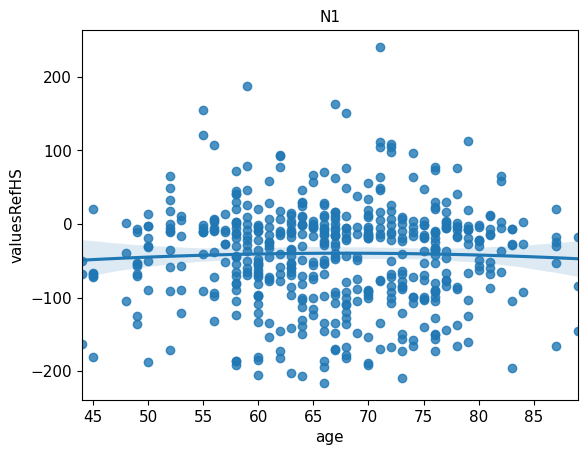

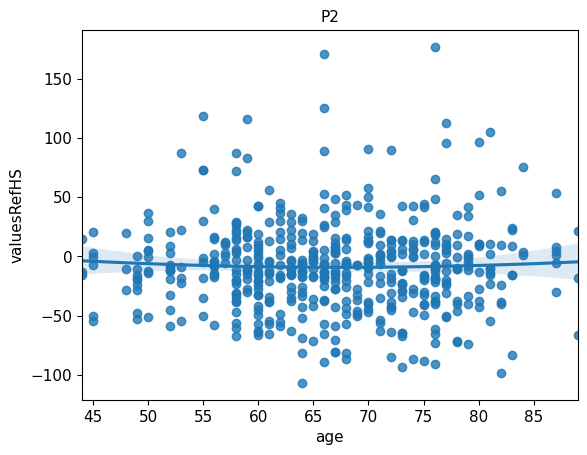

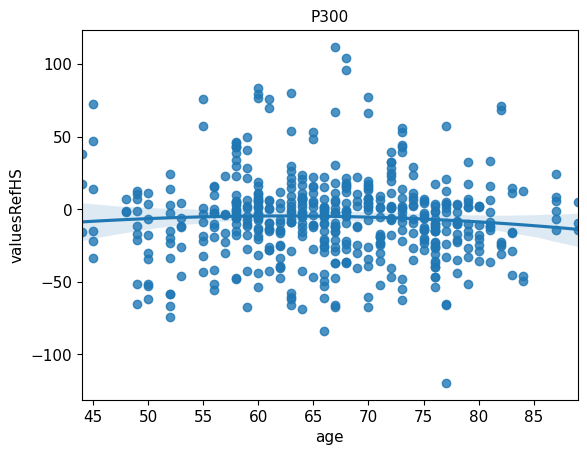

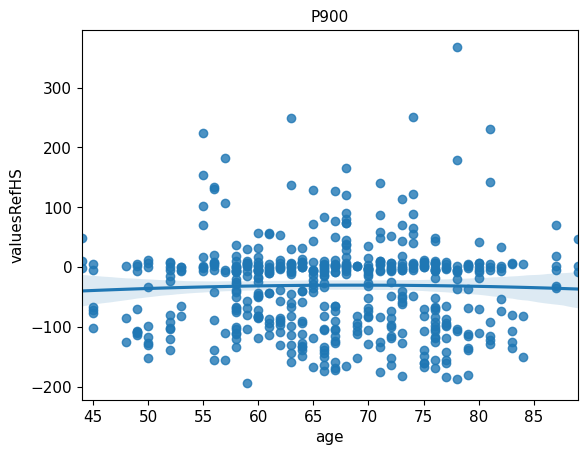

In [57]:
for i in ['P1', 'N1', 'P2', 'P300', 'P600', 'P900']:
    plt.figure()
    plt.title(i)
    sns.regplot(data=tab[tab['featName']==i], y='valuesRefHS', x='age', order=2, scatter=True)

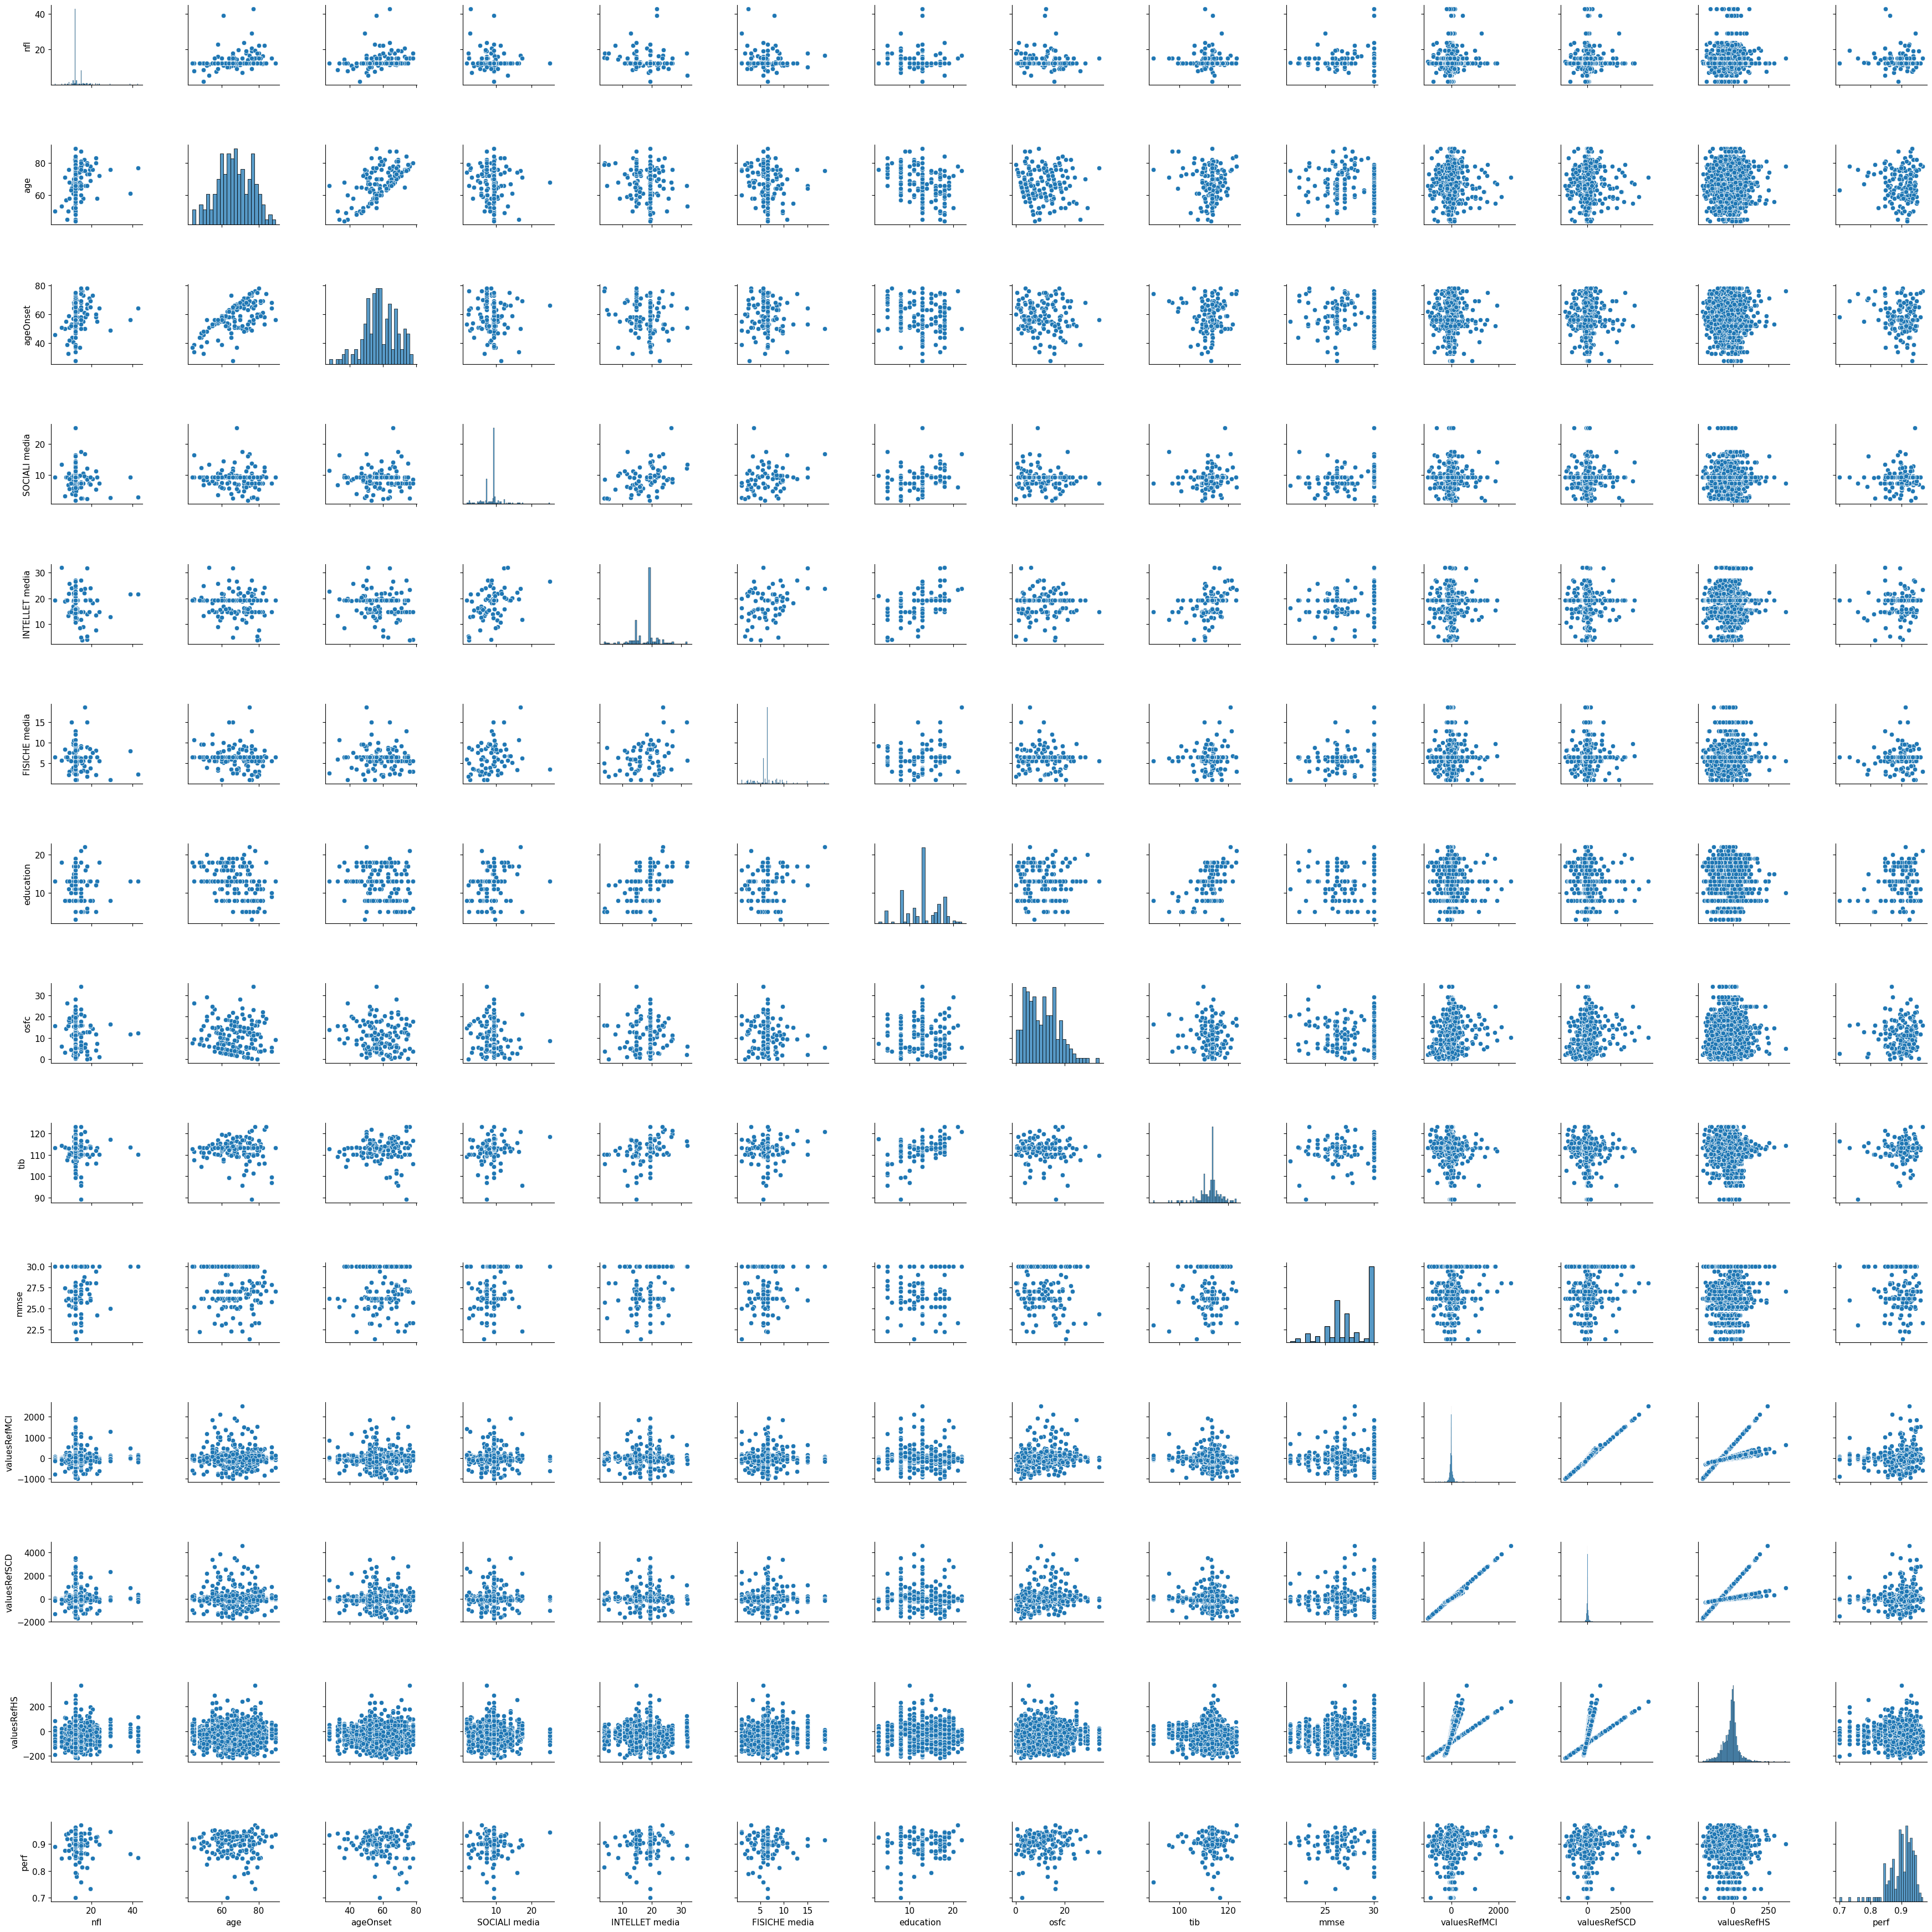

In [58]:
sns.pairplot(tab[['nfl', 'age', 'ageOnset', 
                 'SOCIALI media', 'INTELLET media', 'FISICHE media',
                 'education', 'osfc', 'tib', 'mmse', 'valuesRefMCI','valuesRefSCD','valuesRefHS','perf']])

# Aggiustamento del layout dei subplot
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.75)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_corrFEATS.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats


masks = ['HS', 'SCD', 'MCI']  # Elenca qui le tue maschere

# Calcola le matrici di correlazione per ogni maschera
correlation_matrices = {}
for mask in masks:
    matrix = np.zeros((len(FEATURES['NEURAL_noFCnoINT_mean']), len(FEATURES['NEURAL_noFCnoINT_mean'])))
    for i, featx in enumerate(FEATURES['NEURAL_noFCnoINT_mean']):
        for j, featy in enumerate(FEATURES['NEURAL_noFCnoINT_mean']):
            r, p = scipy.stats.spearmanr(df_merge_cleaned[featx][df_merge_cleaned['Conditions']==mask], df_merge_cleaned[featy][df_merge_cleaned['Conditions']==mask])
            matrix[i, j] = r
    correlation_matrices[mask] = matrix

# Crea le heatmap per ogni maschera
fig, axes = plt.subplots(3, 1, figsize=(7, 11), sharey=True, sharex=True)
for i, mask in enumerate(masks):
    ax = axes[i]
    sns.heatmap(correlation_matrices[mask], 
                annot=False, cmap='coolwarm', fmt='.2f', ax=ax, 
                vmin=-1, vmax=1,
                xticklabels=FEATURES['NEURAL_noFCnoINT_mean'], 
                yticklabels=FEATURES['NEURAL_noFCnoINT_mean'])
    ax.set_title(f'Correlation Matrix - {mask}')
    ax.set_xlabel('Features')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()


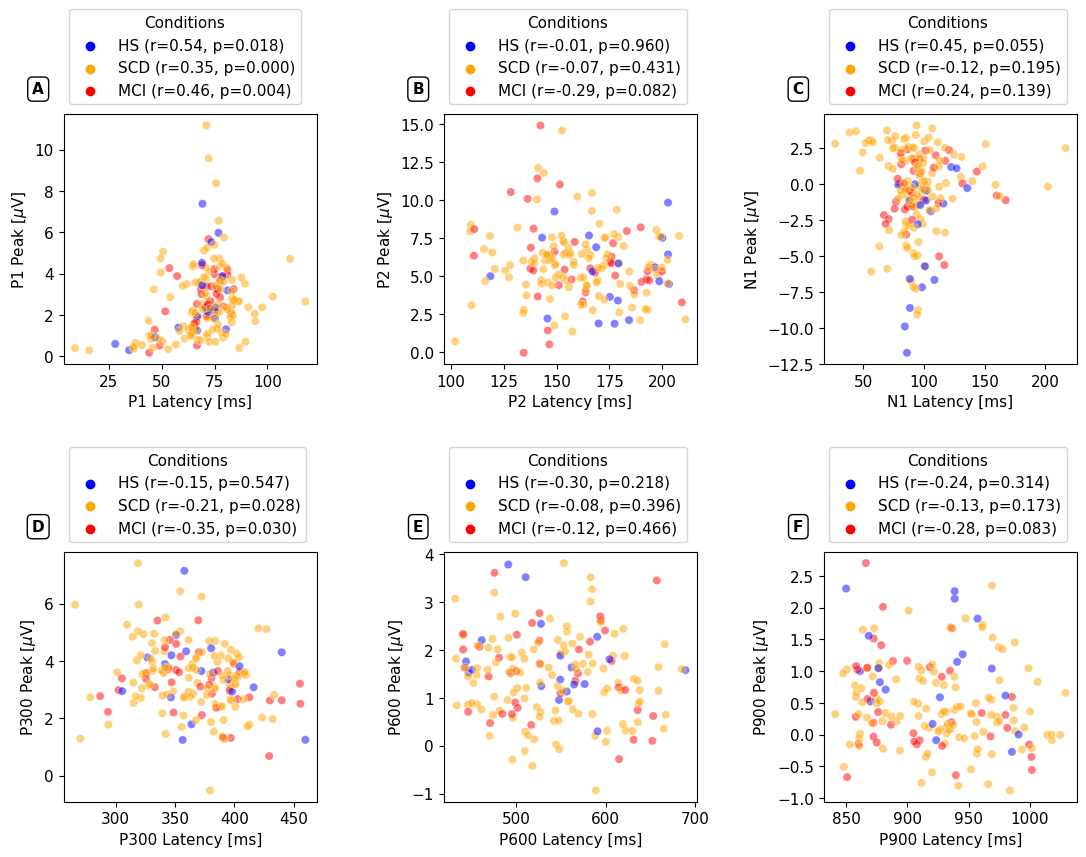

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Definizione delle feature di latenza e picco
latency_features = ['TCVT_P1_LAT_O_mean', 'TCVT_P2_LAT_O_mean', 'TCVT_N1_LAT_O_mean',
                    'TCVT_P300_LAT_C_mean', 'TCVT_P600_LAT_C_mean', 'TCVT_P900_LAT_C_mean']
peak_features = ['TCVT_P1_PEAK_O_mean', 'TCVT_P2_PEAK_O_mean', 'TCVT_N1_PEAK_O_mean',
                 'TCVT_P300_PEAK_C_mean', 'TCVT_P600_PEAK_C_mean', 'TCVT_P900_PEAK_C_mean']

# Creazione dei subplot per gli scatter plot
fig, axes = plt.subplots(2, 3, figsize=(11, 9))

# Definizione delle maschere
masks = {
    'HS': df_merge_cleaned['Conditions'] == 'HS',
    'SCD': df_merge_cleaned['Conditions'] == 'SCD',
    'MCI': df_merge_cleaned['Conditions'] == 'MCI'
}

# Iterazione per creare gli scatter plot e calcolare la correlazione
for i in range(len(latency_features)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Creazione dello scatter plot con Seaborn
    sns.scatterplot(x=df_merge_cleaned[latency_features[i]], 
                    y=df_merge_cleaned[peak_features[i]], 
                    hue=df_merge_cleaned['Conditions'], 
                    palette = ['b', 'orange', 'r'],
                             hue_order=['HS', 'SCD', 'MCI'],

                    ax=ax, alpha=0.5)
    
    # Lista per memorizzare le informazioni sulla correlazione per la legenda
    legend_labels = []
    
    # Calcolo della correlazione di Spearman e aggiunta della regline se significativa
    for condition, mask in masks.items():
        r, p = spearmanr(df_merge_cleaned[latency_features[i]][mask], df_merge_cleaned[peak_features[i]][mask])
        
        # Informazioni sulla legenda con numero di campioni e correlazione
        sample_size = np.sum(mask)
        legend_labels.append(f'{condition} (r={r:.2f}, p={p:.3f})')
        
    
    ax.set_xlabel(f'{latency_features[i].split("_")[1]} Latency [ms]')
    ax.set_ylabel(f'{latency_features[i].split("_")[1]} Peak [$\mu$V]')
    # Aggiungi lettere in alto a destra su ciascun plot
    ax.annotate(letters[i], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))

    #ax.legend(title='Conditions', labels=legend_labels, loc='upper left', bbox_to_anchor=[-0.01, 0.45, 1,1])
    # Ottieni handle e labels dalla leggenda attuale e modifica le etichette
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=legend_labels, title='Conditions', loc='upper left', bbox_to_anchor=[-0.01, 0.45, 1, 1])

    
# Aggiustamento del layout dei subplot
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.75)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_corRTPEAK.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

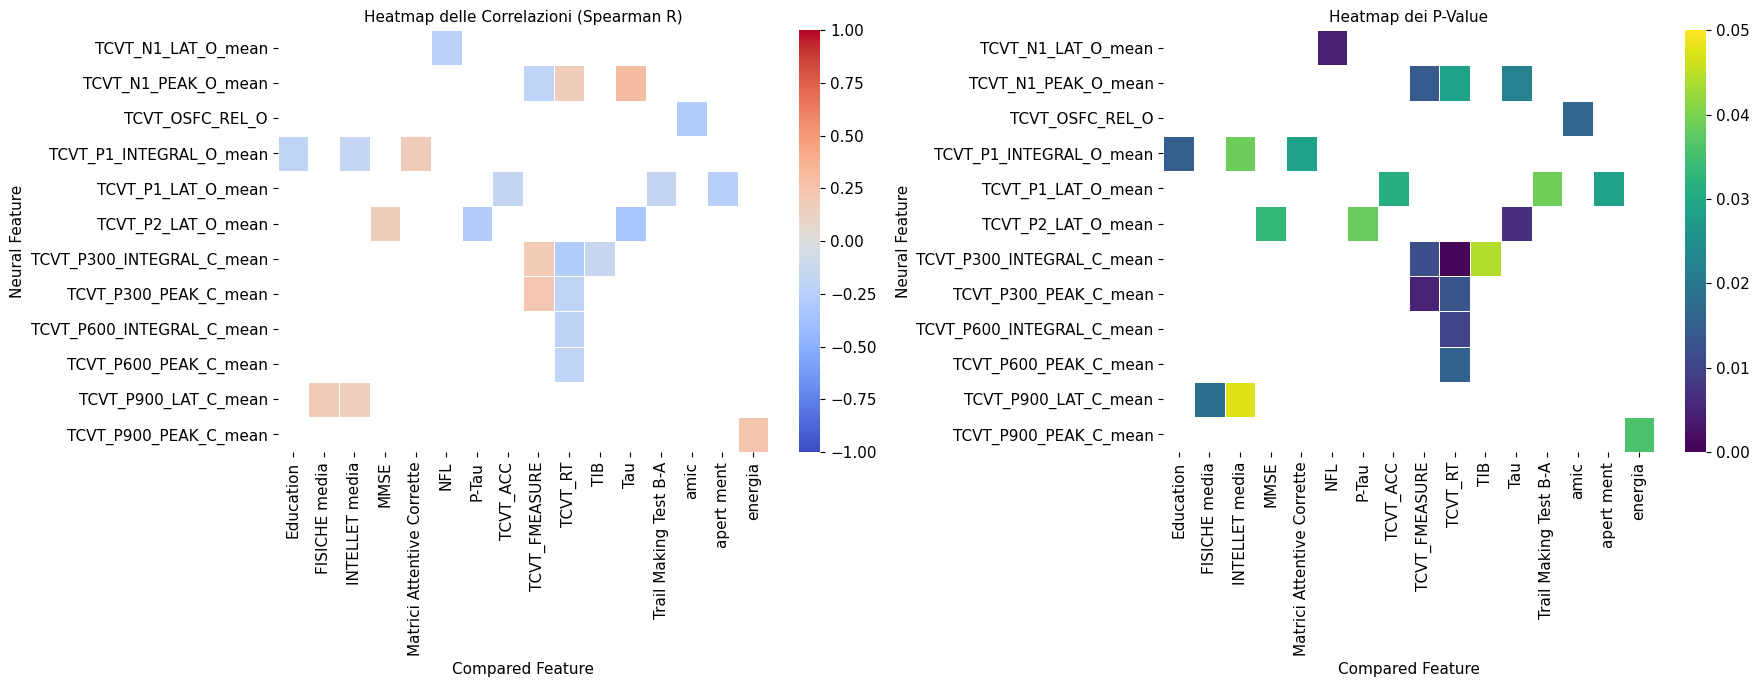

In [61]:
feature_categories = ['BIOMARKER', 'BEHAVIOUR', 'CLINICAL_B', 'CLINICAL_A', 'VISUO_ATTENTIVE', 'LEASURE_TIME', 'PSYCHO']
features_to_check = {key: FEATURES[key] for key in feature_categories}

correlation_results = []
for neural_feat in FEATURES['NEURAL_mean']:
    for category, feats in features_to_check.items():
        for feat in feats:
            valid_data = df_merge_cleaned[[neural_feat, feat]].loc[SCD + MCI].dropna()
            r, p = scipy.stats.spearmanr(valid_data[neural_feat], valid_data[feat], nan_policy='omit')
            p = np.min([p, 1])
            correlation_results.append([neural_feat, feat, category, r, p])

df_correlation = pd.DataFrame(correlation_results, columns=['Neural Feature', 'Compared Feature', 'Class', 'Spearman R', 'P-Value'])
df_correlation = df_correlation.sort_values(by='P-Value')
df_correlation_filtered = df_correlation[df_correlation['P-Value'] < 0.05]

if not df_correlation_filtered.empty:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(df_correlation_filtered.pivot(index="Neural Feature", 
                                              columns="Compared Feature", 
                                              values="Spearman R"),
                annot=False, cmap="coolwarm", fmt=".2f",
                vmin=-1, vmax=1,
                linewidths=0.5, ax=axes[0])
    axes[0].set_title("Heatmap delle Correlazioni (Spearman R)")
    sns.heatmap(df_correlation_filtered.pivot(index="Neural Feature", columns="Compared Feature", values="P-Value"), 
                vmin=0, vmax=0.05,
                annot=False, cmap="viridis", fmt=".2f", linewidths=0.5, ax=axes[1])
    axes[1].set_title("Heatmap dei P-Value")
    plt.tight_layout()
    plt.show()


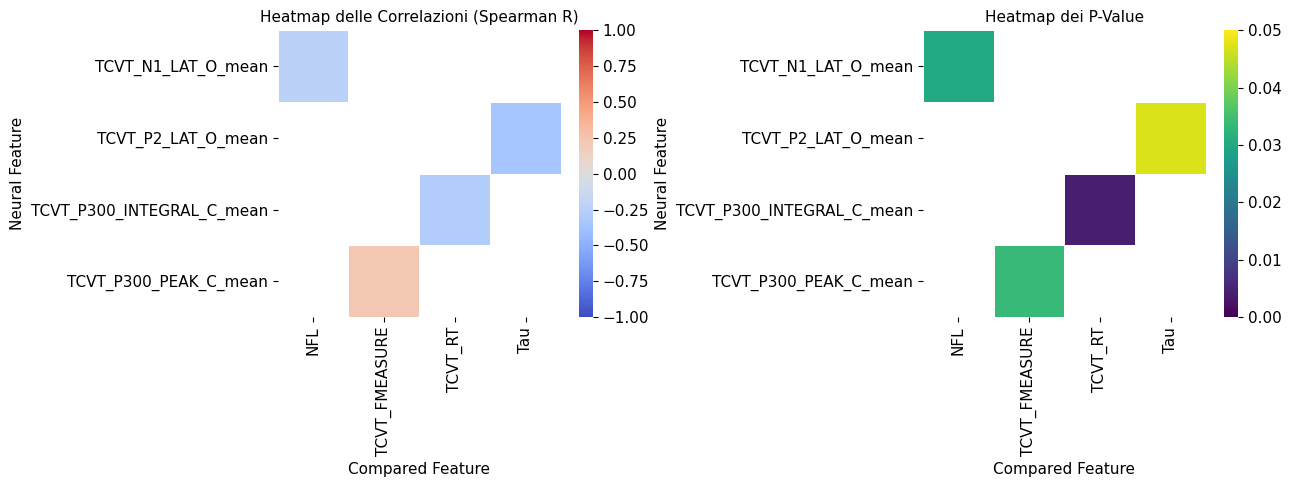

In [62]:
feature_categories = ['BIOMARKER', 'BEHAVIOUR', 'CLINICAL_B', 'CLINICAL_A', 'VISUO_ATTENTIVE', 'LEASURE_TIME', 'PSYCHO']
features_to_check = {key: FEATURES[key] for key in feature_categories}

correlation_results = []
for neural_feat in FEATURES['NEURAL_mean']:
    for category, feats in features_to_check.items():
        for feat in feats:
            valid_data = df_merge_cleaned[[neural_feat, feat]].loc[SCD + MCI].dropna()
            r, p = scipy.stats.spearmanr(valid_data[neural_feat], valid_data[feat], nan_policy='omit')
            p = np.min([p*7, 1])
            correlation_results.append([neural_feat, feat, category, r, p])

df_correlation = pd.DataFrame(correlation_results, columns=['Neural Feature', 'Compared Feature', 'Class', 'Spearman R', 'P-Value'])
df_correlation = df_correlation.sort_values(by='P-Value')
df_correlation_filtered = df_correlation[df_correlation['P-Value'] < 0.05]

if not df_correlation_filtered.empty:
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    sns.heatmap(df_correlation_filtered.pivot(index="Neural Feature", 
                                              columns="Compared Feature", 
                                              values="Spearman R"),
                annot=False, cmap="coolwarm", fmt=".2f",
                vmin=-1, vmax=1,
                linewidths=0.5, ax=axes[0])
    axes[0].set_title("Heatmap delle Correlazioni (Spearman R)")
    sns.heatmap(df_correlation_filtered.pivot(index="Neural Feature", columns="Compared Feature", values="P-Value"), 
                vmin=0, vmax=0.05,
                annot=False, cmap="viridis", fmt=".2f", linewidths=0.5, ax=axes[1])
    axes[1].set_title("Heatmap dei P-Value")
    plt.tight_layout()
    plt.show()


